## Analyzing Cremona from open street map data

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import shapely


In [2]:
# Let's get the data from Open Street Map
place_name = "Cremona, Italy"
graph = ox.graph_from_place(place_name, network_type='drive', which_result= 2)
prj_G = ox.projection.project_graph(graph)


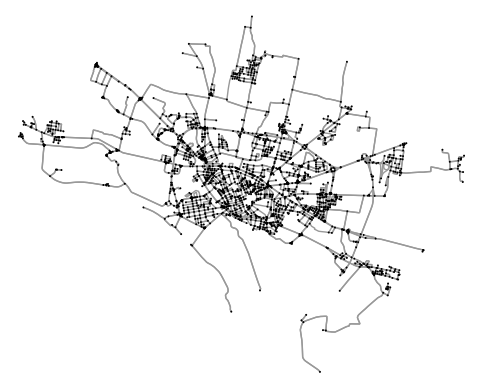

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [3]:
fig, ax = plt.subplots()
ox.plot_graph(prj_G, ax=ax, node_size= 2, node_color='black')

In [4]:
# Compute the basic stats
stats = ox.basic_stats(prj_G)
stats

{'n': 2280,
 'm': 4786,
 'k_avg': 4.198245614035088,
 'edge_length_total': 506531.7928779334,
 'edge_length_avg': 105.8361456075916,
 'streets_per_node_avg': 2.818421052631579,
 'streets_per_node_counts': {0: 0, 1: 299, 2: 20, 3: 1766, 4: 188, 5: 5, 6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13114035087719297,
  2: 0.008771929824561403,
  3: 0.7745614035087719,
  4: 0.0824561403508772,
  5: 0.0021929824561403508,
  6: 0.0008771929824561404},
 'intersection_count': 1981,
 'street_length_total': 311711.10041396465,
 'street_segment_count': 3197,
 'street_length_avg': 97.50112618516255,
 'circuity_avg': 1.0552624516231983,
 'self_loop_proportion': 0.0015639662183296842}

(0.0, 1.0)

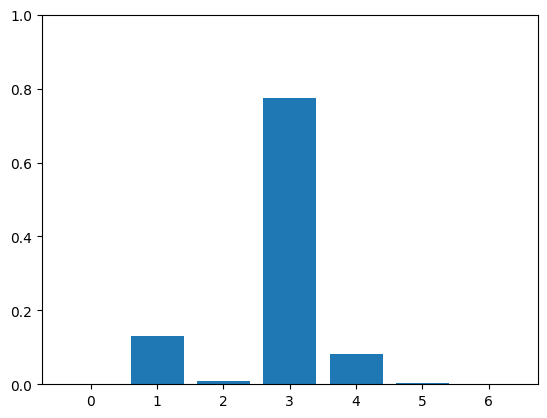

In [5]:
# Plot degree distribution
cat = stats['streets_per_node_proportions'].keys()
freq = stats['streets_per_node_proportions'].values()

plt.bar(cat,freq)
plt.ylim(0,1)



In [6]:
# Let's create a GeoDataFrame from the graph
gdf_nodes, gdf_edges = ox.graph_to_gdfs(prj_G)
gdf_nodes.head()

y              x  street_count highway junction  \
osmid                                                                   
249617125  5.000033e+06  578681.931488             3     NaN      NaN   
302402633  4.999980e+06  578679.421611             3     NaN      NaN   
249617128  4.999968e+06  578742.690104             3     NaN      NaN   
302402587  4.999994e+06  578765.527141             3     NaN      NaN   
302415503  4.999956e+06  578784.130629             3     NaN      NaN   

                                 geometry  
osmid                                      
249617125  POINT (578681.931 5000032.907)  
302402633  POINT (578679.422 4999980.367)  
249617128   POINT (578742.69 4999967.629)  
302402587  POINT (578765.527 4999993.867)  
302415503  POINT (578784.131 4999955.721)

In [7]:
gdf_nodes.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# Select specific nodes with lat and lon
lat, lon = 45.139614, 10.026505
start_point = shapely.geometry.Point(lon, lat)
start_point_gdf = gpd.GeoDataFrame(geometry=[start_point], crs= "EPSG:4326")
start_point_gdf = start_point_gdf.to_crs(gdf_nodes.crs)
print(start_point_gdf.geometry.x[0], start_point_gdf.geometry.y[0])
start = ox.distance.nearest_nodes(prj_G, start_point_gdf.geometry.x[0], start_point_gdf.geometry.y[0])
print(start)

580707.5607852439 4998972.427854139
282576292


In [9]:
gdf_nodes.loc[start]

y                                            4999002.789858
x                                             580717.759562
street_count                                              3
highway                                                 NaN
junction                                                NaN
geometry        POINT (580717.7595624436 4999002.789858477)
Name: 282576292, dtype: object

In [10]:
# find the gdf_node corresponding to the start node
start_node = gdf_nodes.loc[start]

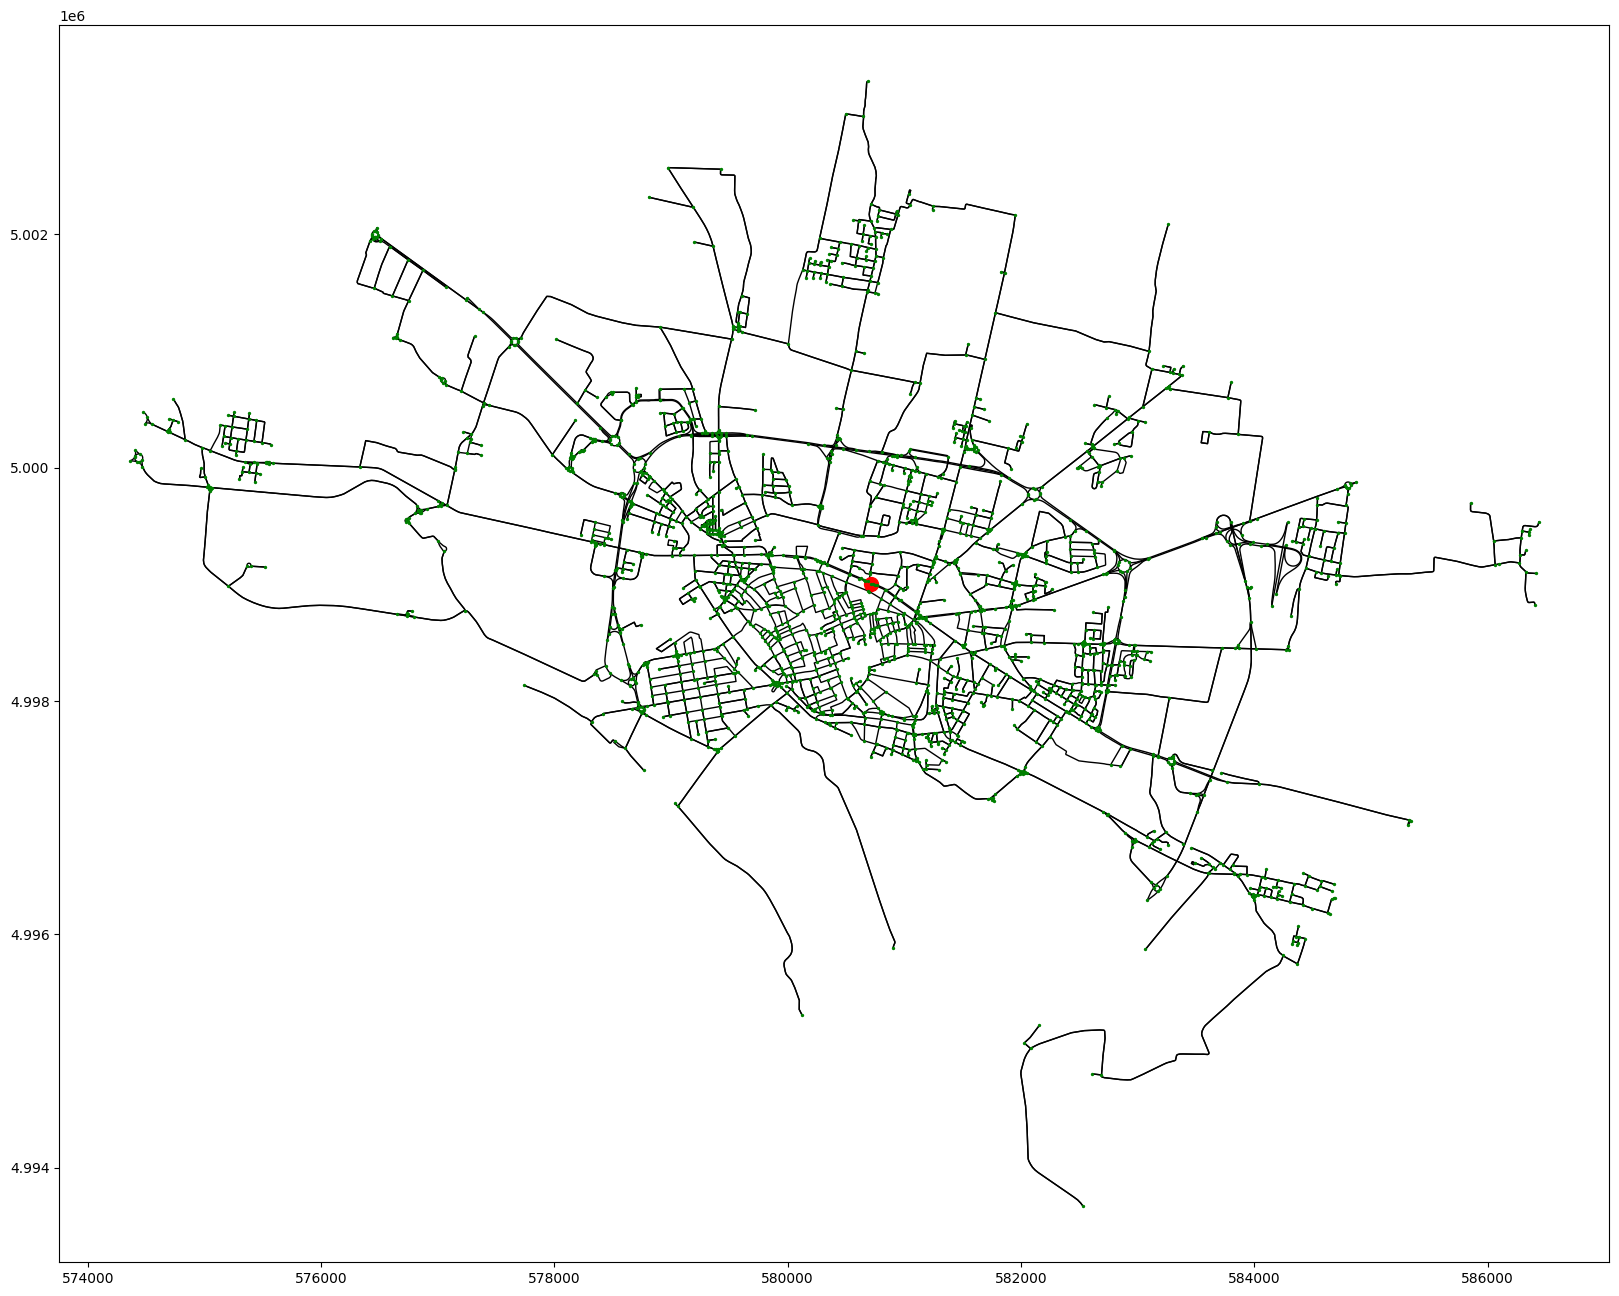

In [11]:
#Highlighting the start node by plotting nodes and edges and not the original graph
#plot gdb_nodes and gdf_edges
fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=100)

In [12]:
arrive_lat, arrive_lon = 45.12868, 10.00280
arrive_point = shapely.geometry.Point(arrive_lon, arrive_lat)
arrive_point_gdf = gpd.GeoDataFrame(geometry=[arrive_point], crs= "EPSG:4326")
arrive_point_gdf = arrive_point_gdf.to_crs(gdf_nodes.crs)
print(arrive_point_gdf.geometry.x[0], arrive_point_gdf.geometry.y[0])
arrive = ox.distance.nearest_nodes(prj_G, arrive_point_gdf.geometry.x[0], arrive_point_gdf.geometry.y[0])

arrive_node = gdf_nodes.loc[arrive]

578858.8571763304 4997734.373224317


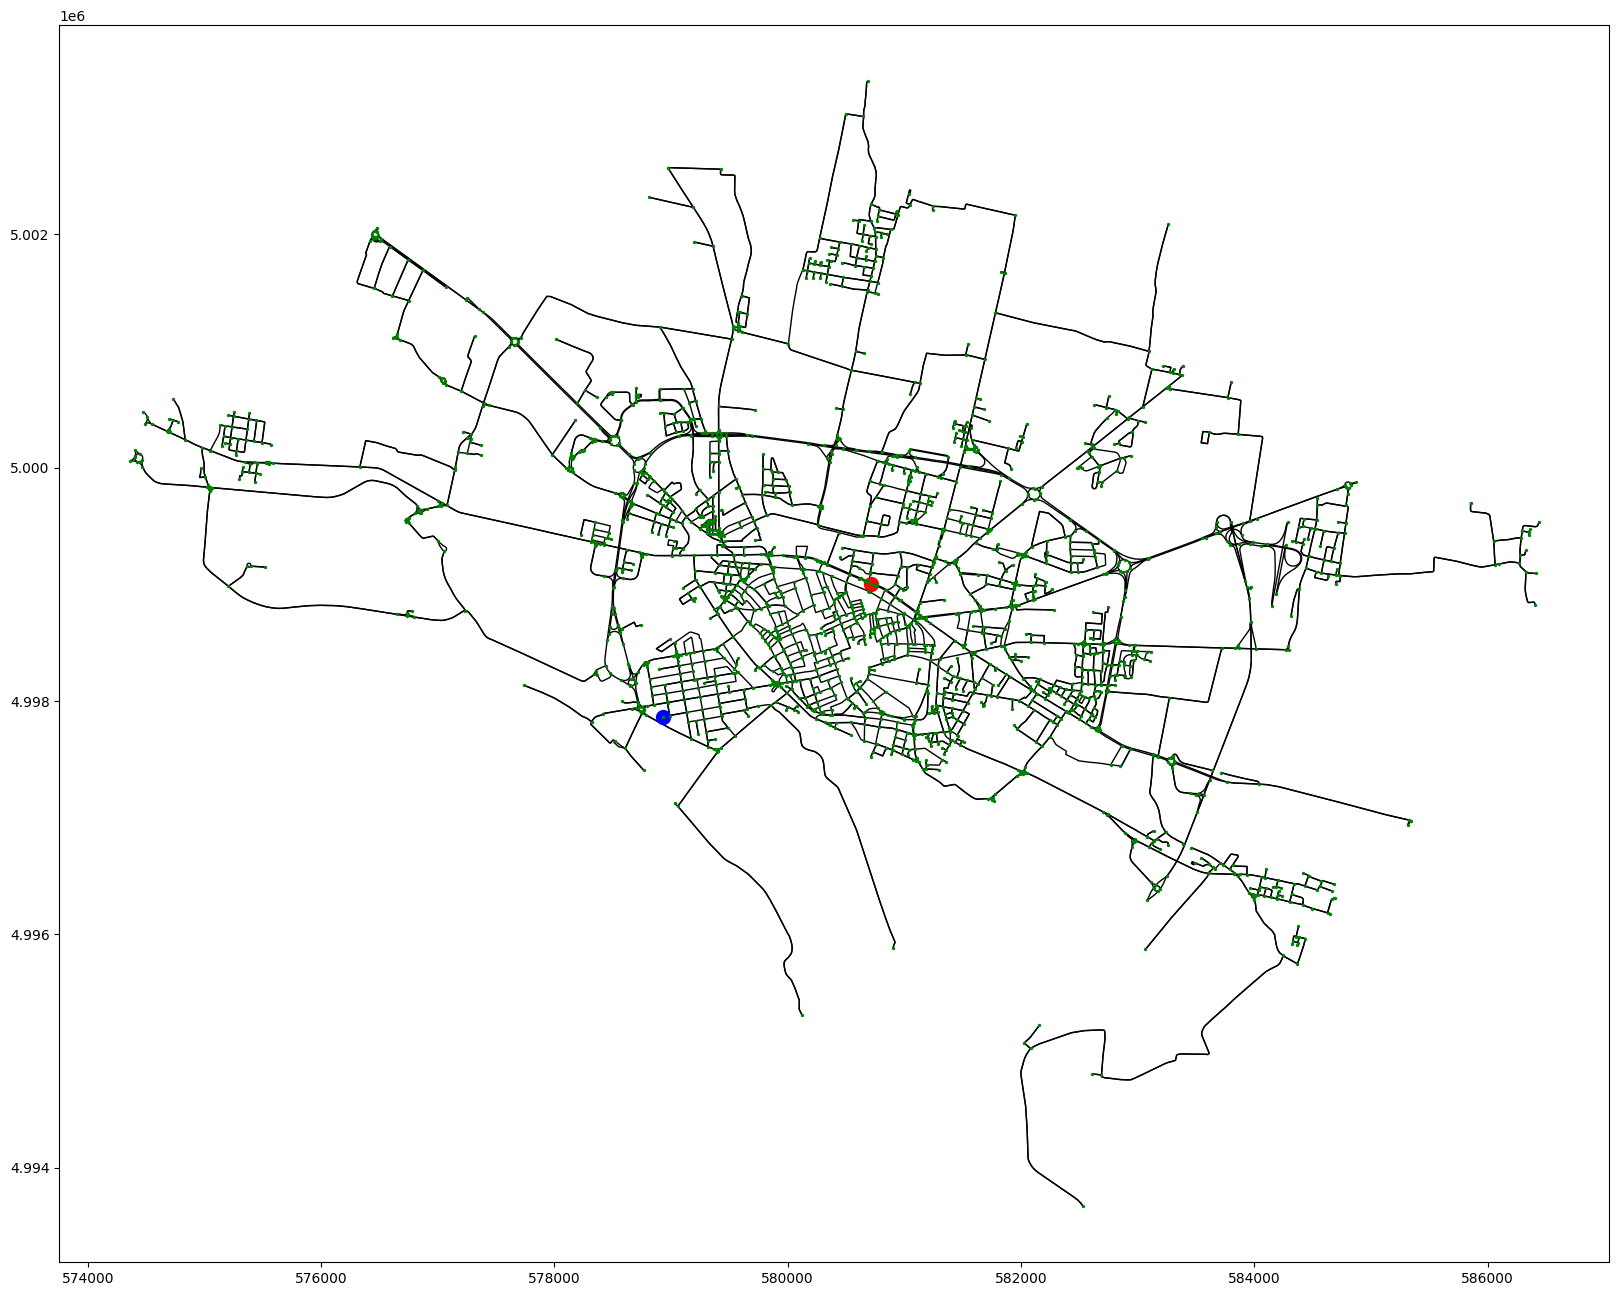

In [13]:
# Plotssss
fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=100)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='blue', s=100)


Took me 2 hours to paint red and blue dots on a map. not proud of this.
### Shortest path

In [14]:
gdf_edges.head()

osmid    highway    junction lanes  \
u         v         key                                          
249617125 302402633 0    27547575    primary  roundabout     2   
302402633 332198526 0    27547575    primary  roundabout     2   
          853019208 0    27706271    primary         NaN     2   
249617128 302402587 0    27547575    primary  roundabout     2   
          302415503 0    27548810  secondary         NaN   NaN   

                                    name       ref  oneway reversed  \
u         v         key                                               
249617125 302402633 0      Via Seminario  SPexSS10    True    False   
302402633 332198526 0      Via Seminario  SPexSS10    True    False   
          853019208 0      Via Seminario  SPexSS10    True    False   
249617128 302402587 0      Via Seminario  SPexSS10    True    False   
          302415503 0    Via Castelleone       NaN    True    False   

                             length  \
u         v         key               
249617125 302402633 0     53.534697   
302402633 332198526 0     67.514562   
          853019208 0    118.332108   
249617128 302402587 0     34.828924   
          302415503 0     43.788035   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (578681.931 5000032.907, 578678.414...   
302402633 332198526 0    LINESTRING (578679.422 4999980.367, 578686.185...   
          853019208 0    LINESTRING (578679.422 4999980.367, 578681.023...   
249617128 302402587 0    LINESTRING (578742.69 4999967.629, 578754.881 ...   
          302415503 0    LINESTRING (578742.69 4999967.629, 578758.493 ...   

                        maxspeed bridge tunnel width access  
u         v         key                                      
249617125 302402633 0        NaN    NaN    NaN   NaN    NaN  
302402633 332198526 0        NaN    NaN    NaN   NaN    NaN  
          853019208 0        NaN    NaN    NaN   NaN    NaN  
249617128 302402587 0        NaN    NaN    NaN   NaN    NaN  
          302415503 0        NaN    NaN    NaN   NaN    NaN

In [15]:
# Let's find the shortest path
route = nx.shortest_path(prj_G, start, arrive, weight='length')
route_edges = list(zip(route, route[1:]))

print(route_edges)
ec = ['r' if edge in route_edges else 'blue' for edge in prj_G.edges()]
es = [3 if edge in route_edges else 1 for edge in prj_G.edges()]
#print(ec)

[(282576292, 2836081292), (2836081292, 5429146382), (5429146382, 5429146388), (5429146388, 852939665), (852939665, 5433301884), (5433301884, 5433301907), (5433301907, 852939317), (852939317, 852939623), (852939623, 852939426), (852939426, 852939357), (852939357, 852939670), (852939670, 6405157903), (6405157903, 852939918), (852939918, 662426884), (662426884, 662426885), (662426885, 2369346412), (2369346412, 2369346408), (2369346408, 852939793), (852939793, 866467818), (866467818, 5612343987), (5612343987, 852912354), (852912354, 9313008596), (9313008596, 852912775), (852912775, 852912500), (852912500, 852912699), (852912699, 852911797), (852911797, 4688794686), (4688794686, 852912529), (852912529, 852912181), (852912181, 252474598), (252474598, 252474599), (252474599, 852911808), (852911808, 297653762), (297653762, 1498947458), (1498947458, 297653754), (297653754, 852975942), (852975942, 297653717), (297653717, 852939431), (852939431, 423358833), (423358833, 2250040998), (2250040998, 4

The length of the route is:  2865 m


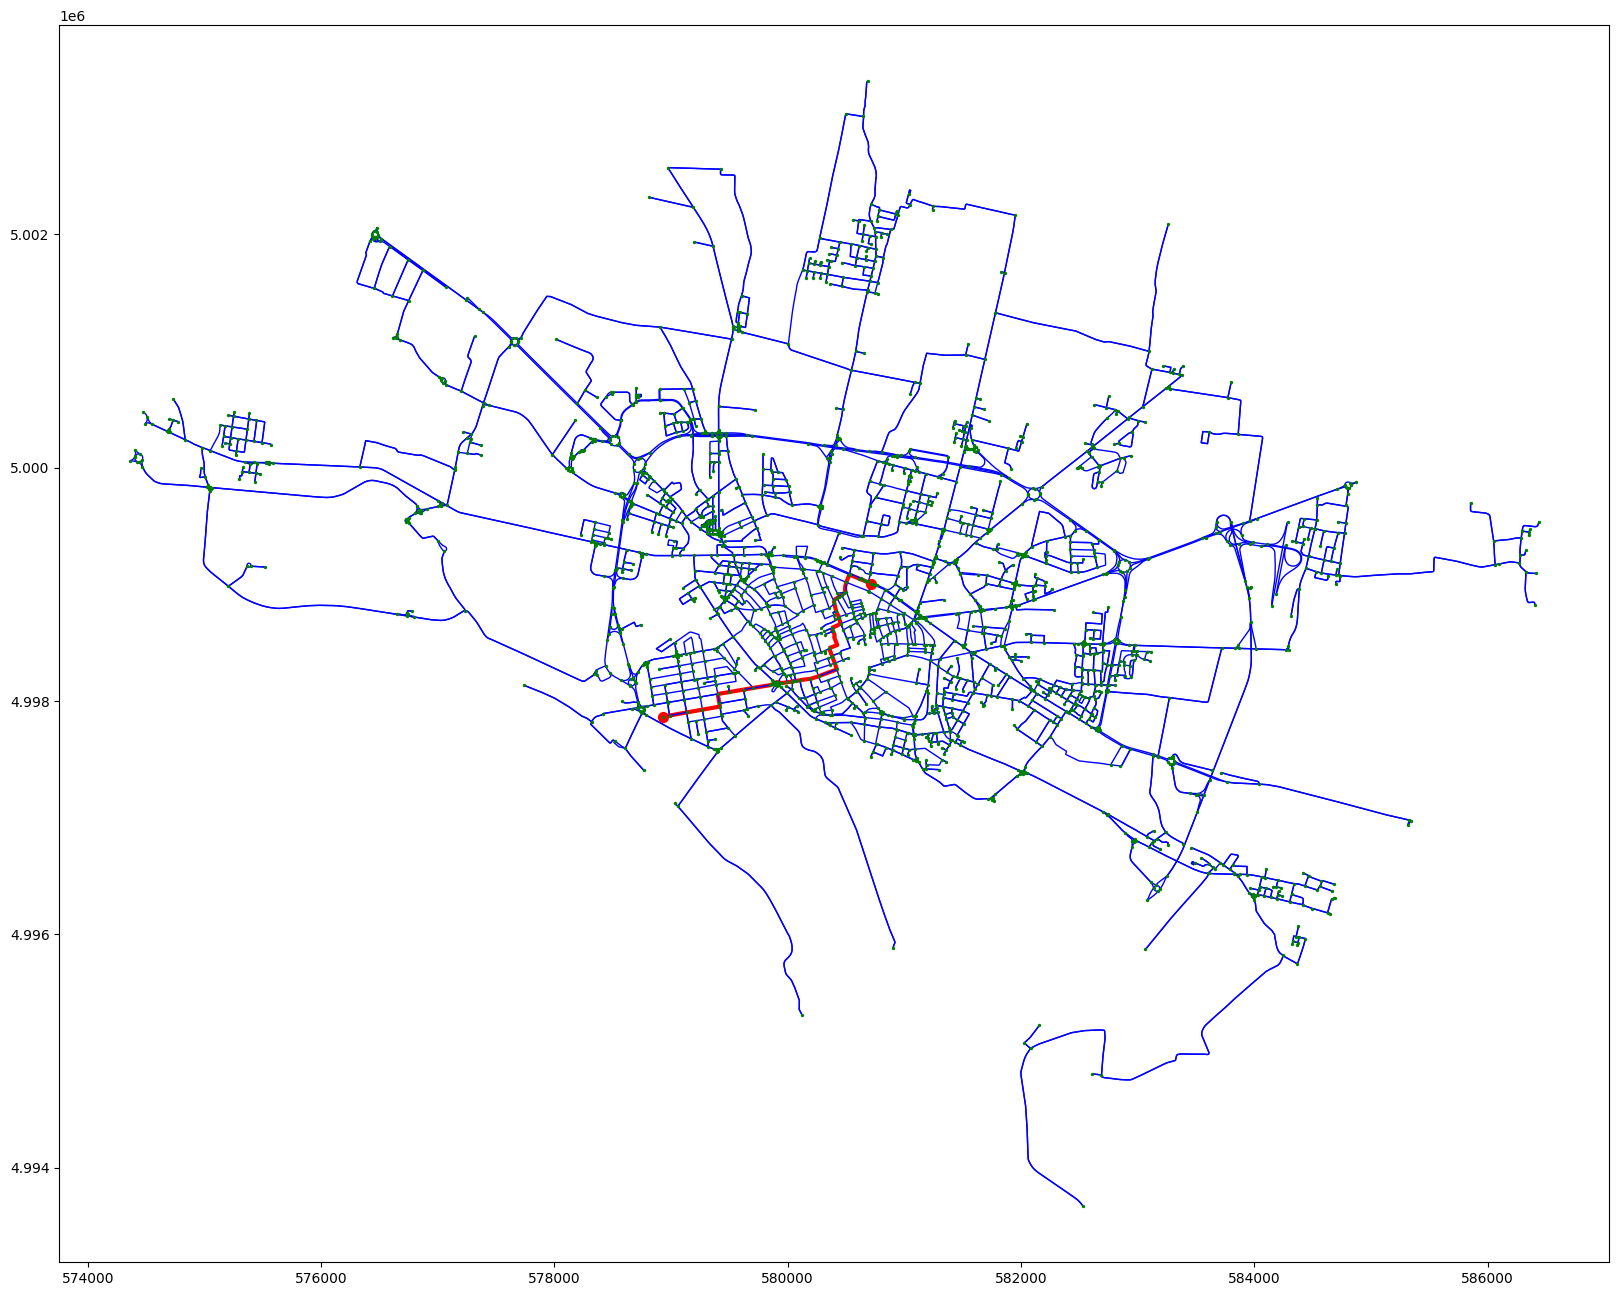

In [16]:

#plot
fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=es, edgecolor= ec, zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)
#plot the route

# Length of the route
routegdf = ox.routing.route_to_gdf(prj_G, route, weight='length')
lenght = int(routegdf['length'].sum())
print("The length of the route is: ", lenght, "m")


In [17]:
# Convert the route to CRS 4326
routegdf = routegdf.to_crs("EPSG:4326")

In [18]:
# export 
routegdf.to_file("route.geojson", driver='GeoJSON')

Everything looks good, of course some roads are not drivable due to traffic restrictions, but the route is correct.

In [19]:
# Let's use time as weight, and find the shortest path, we need to insert the speed of the roads
prj_G_speed = ox.add_edge_speeds(prj_G)
prj_G_speed = ox.add_edge_travel_times(prj_G_speed)

In [20]:
edges = ox.graph_to_gdfs(prj_G_speed, nodes=False, edges=True)
edges['highway'] = edges['highway'].astype(str)
edges.groupby("highway")[["length", "speed_kph", "travel_time"]].mean().round(1)

length  speed_kph  travel_time
highway                                                        
['residential', 'unclassified']   214.5       36.5         21.2
['secondary', 'secondary_link']    25.3       51.0          1.8
['tertiary', 'unclassified']      186.6       47.8         14.1
living_street                      75.8       58.4          4.7
motorway                          578.4      130.0         16.0
motorway_link                     302.9       40.0         27.3
primary                           146.7       58.4          8.9
primary_link                       96.1       55.0          6.4
residential                        82.4       36.5          8.2
secondary                          99.6       51.0          6.9
secondary_link                    129.0       58.4          7.9
tertiary                          112.1       47.8          8.5
tertiary_link                      50.0       58.4          3.1
trunk                             337.3       67.9         18.0
trunk_link                        117.7       60.0          7.1
unclassified                      245.3       37.8         23.3

In [21]:
edges.head()

osmid    highway    junction lanes  \
u         v         key                                          
249617125 302402633 0    27547575    primary  roundabout     2   
302402633 332198526 0    27547575    primary  roundabout     2   
          853019208 0    27706271    primary         NaN     2   
249617128 302402587 0    27547575    primary  roundabout     2   
          302415503 0    27548810  secondary         NaN   NaN   

                                    name       ref  oneway reversed  \
u         v         key                                               
249617125 302402633 0      Via Seminario  SPexSS10    True    False   
302402633 332198526 0      Via Seminario  SPexSS10    True    False   
          853019208 0      Via Seminario  SPexSS10    True    False   
249617128 302402587 0      Via Seminario  SPexSS10    True    False   
          302415503 0    Via Castelleone       NaN    True    False   

                             length  \
u         v         key               
249617125 302402633 0     53.534697   
302402633 332198526 0     67.514562   
          853019208 0    118.332108   
249617128 302402587 0     34.828924   
          302415503 0     43.788035   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (578681.931 5000032.907, 578678.414...   
302402633 332198526 0    LINESTRING (578679.422 4999980.367, 578686.185...   
          853019208 0    LINESTRING (578679.422 4999980.367, 578681.023...   
249617128 302402587 0    LINESTRING (578742.69 4999967.629, 578754.881 ...   
          302415503 0    LINESTRING (578742.69 4999967.629, 578758.493 ...   

                         speed_kph  travel_time maxspeed bridge tunnel width  \
u         v         key                                                        
249617125 302402633 0    58.410596     3.299485      NaN    NaN    NaN   NaN   
302402633 332198526 0    58.410596     4.161102      NaN    NaN    NaN   NaN   
          853019208 0    58.410596     7.293122      NaN    NaN    NaN   NaN   
249617128 302402587 0    58.410596     2.146599      NaN    NaN    NaN   NaN   
          302415503 0    51.029412     3.089139      NaN    NaN    NaN   NaN   

                        access  
u         v         key         
249617125 302402633 0      NaN  
302402633 332198526 0      NaN  
          853019208 0      NaN  
249617128 302402587 0      NaN  
          302415503 0      NaN

In [22]:
# Let's find the shortest path
route2 = nx.shortest_path(prj_G_speed, start, arrive, weight='travel_time')
route_edges2 = list(zip(route2, route2[1:]))

ec2 = ['r' if edge in route_edges2 else 'blue' for edge in prj_G_speed.edges()]
es2 = [3 if edge in route_edges2 else 1 for edge in prj_G_speed.edges()]

The length of the route is:  2885 m


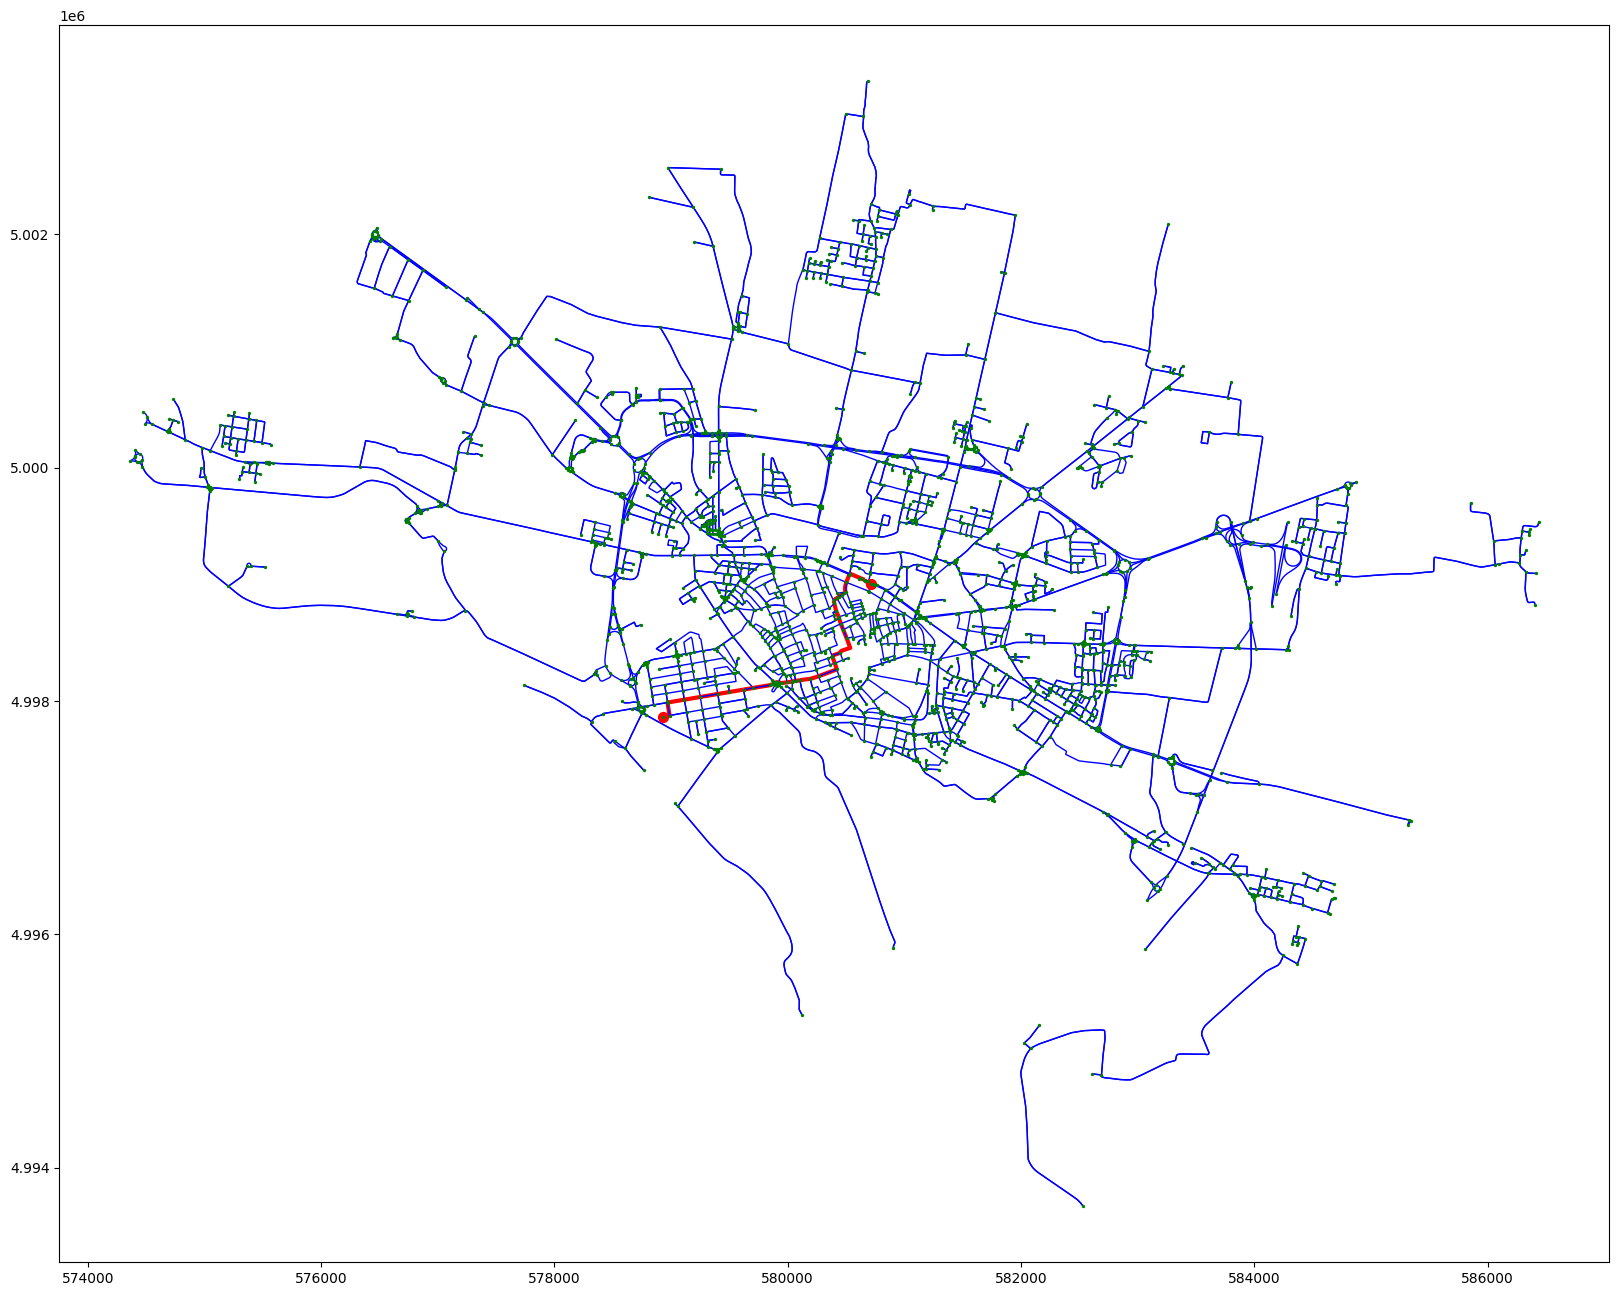

In [23]:
#plot
fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=es2, edgecolor= ec2, zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)

# Length of the route
routegdf2 = ox.routing.route_to_gdf(prj_G_speed, route2, weight='travel_time')
lenght2 = int(routegdf2['length'].sum())

print("The length of the route is: ", lenght2, "m")

In [24]:
# Compute the time of the route for both cases
routegdf = ox.routing.route_to_gdf(prj_G_speed, route, weight='length')

time1 = int(routegdf['travel_time'].sum())
time2 = int(routegdf2['travel_time'].sum())

print("The time of the route 1 is: ", time1, "s")
print("The time of the route 2 is: ", time2, "s")

The time of the route 1 is:  280 s
The time of the route 2 is:  260 s


In [25]:
# Convert the route to CRS 4326
routegdf2 = routegdf2.to_crs("EPSG:4326")
# export the route to GeoJSON
routegdf2.to_file("route2.geojson", driver='GeoJSON')


Everything looks very good, let's try to adjust to how traffic is in Cremona, and see if we can get a better route.


In [26]:
# Traffic, very naive approach: use inbetween centrality to simulate traffic
bc = nx.betweenness_centrality(prj_G_speed, weight='length')
edge_bc = nx.edge_betweenness_centrality(prj_G_speed, weight='length')


In [27]:
nx.set_node_attributes(prj_G_speed, bc, 'bc')
nx.set_edge_attributes(prj_G_speed, edge_bc, 'edge_bc')

gdf_nodes = ox.graph_to_gdfs(prj_G_speed, edges=False)
gdf_edges = ox.graph_to_gdfs(prj_G_speed, nodes=False, edges=True)


In [28]:
gdf_nodes.head()

y              x  street_count        bc highway  \
osmid                                                                    
249617125  5.000033e+06  578681.931488             3  0.034918     NaN   
302402633  4.999980e+06  578679.421611             3  0.034921     NaN   
249617128  4.999968e+06  578742.690104             3  0.036485     NaN   
302402587  4.999994e+06  578765.527141             3  0.038895     NaN   
302415503  4.999956e+06  578784.130629             3  0.045539     NaN   

          junction                        geometry  
osmid                                               
249617125      NaN  POINT (578681.931 5000032.907)  
302402633      NaN  POINT (578679.422 4999980.367)  
249617128      NaN   POINT (578742.69 4999967.629)  
302402587      NaN  POINT (578765.527 4999993.867)  
302415503      NaN  POINT (578784.131 4999955.721)

<Axes: >

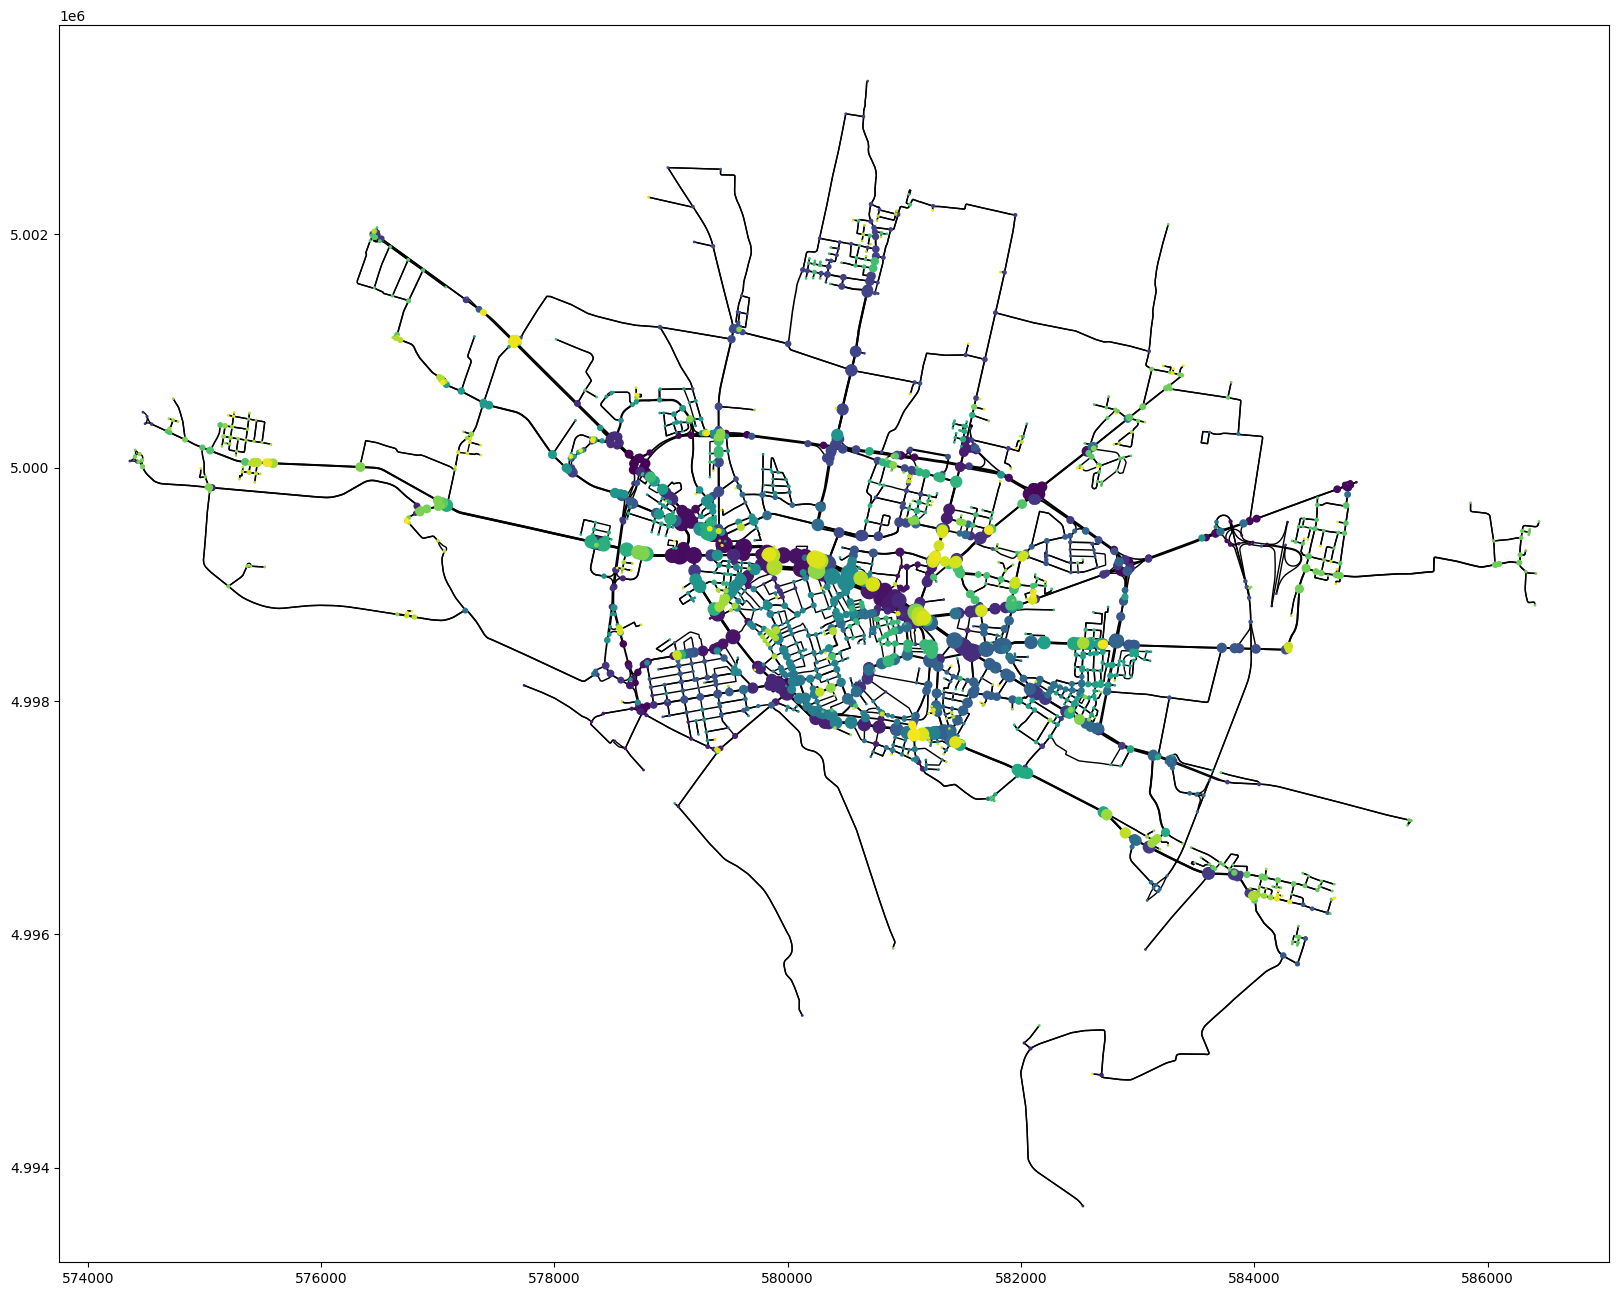

In [29]:
#  centrality
nc = gdf_nodes['bc']
ns = 1+ gdf_nodes['bc']*1000

ec = gdf_edges['edge_bc']
es = 1+ gdf_edges['edge_bc']*20

fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, c = nc, zorder=2, markersize= ns, cmap='viridis')
gdf_edges.plot(ax=ax, linewidth= es, zorder=1, cmap='viridis', edgecolor='black')



In [30]:
# I can use bc to influence the speed of the roads
max = gdf_edges['edge_bc'].max()
min = gdf_edges['edge_bc'].min()

gdf_edges['edge_bc'] = (gdf_edges['edge_bc'] - min)/(max - min)
print(gdf_edges['edge_bc'].max(), gdf_edges['edge_bc'].min())

1.0 0.0


In [31]:
gdf_edges['speed_kph'].head()

u          v          key
249617125  302402633  0      58.410596
302402633  332198526  0      58.410596
           853019208  0      58.410596
249617128  302402587  0      58.410596
           302415503  0      51.029412
Name: speed_kph, dtype: float64

In [32]:
# speed of the roads using edge_bc
gdf_edges['traffic_speed'] = gdf_edges['speed_kph']*(1-gdf_edges['edge_bc']*0.7)
# compute time (in seconds) to travel each edge
gdf_edges['traffic_time'] = gdf_edges['length'] / (gdf_edges['traffic_speed'] * 1000 / 3600)
prj_G_traffic = ox.graph_from_gdfs(gdf_nodes, gdf_edges)


In [33]:
gdf_edges.head()

osmid    highway    junction lanes  \
u         v         key                                          
249617125 302402633 0    27547575    primary  roundabout     2   
302402633 332198526 0    27547575    primary  roundabout     2   
          853019208 0    27706271    primary         NaN     2   
249617128 302402587 0    27547575    primary  roundabout     2   
          302415503 0    27548810  secondary         NaN   NaN   

                                    name       ref  oneway reversed  \
u         v         key                                               
249617125 302402633 0      Via Seminario  SPexSS10    True    False   
302402633 332198526 0      Via Seminario  SPexSS10    True    False   
          853019208 0      Via Seminario  SPexSS10    True    False   
249617128 302402587 0      Via Seminario  SPexSS10    True    False   
          302415503 0    Via Castelleone       NaN    True    False   

                             length  \
u         v         key               
249617125 302402633 0     53.534697   
302402633 332198526 0     67.514562   
          853019208 0    118.332108   
249617128 302402587 0     34.828924   
          302415503 0     43.788035   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (578681.931 5000032.907, 578678.414...   
302402633 332198526 0    LINESTRING (578679.422 4999980.367, 578686.185...   
          853019208 0    LINESTRING (578679.422 4999980.367, 578681.023...   
249617128 302402587 0    LINESTRING (578742.69 4999967.629, 578754.881 ...   
          302415503 0    LINESTRING (578742.69 4999967.629, 578758.493 ...   

                         speed_kph  travel_time   edge_bc maxspeed bridge  \
u         v         key                                                     
249617125 302402633 0    58.410596     3.299485  0.257884      NaN    NaN   
302402633 332198526 0    58.410596     4.161102  0.197348      NaN    NaN   
          853019208 0    58.410596     7.293122  0.060564      NaN    NaN   
249617128 302402587 0    58.410596     2.146599  0.111161      NaN    NaN   
          302415503 0    51.029412     3.089139  0.158156      NaN    NaN   

                        tunnel width access  traffic_speed  traffic_time  
u         v         key                                                   
249617125 302402633 0      NaN   NaN    NaN      47.866378      4.026311  
302402633 332198526 0      NaN   NaN    NaN      50.341538      4.828069  
          853019208 0      NaN   NaN    NaN      55.934287      7.616001  
249617128 302402587 0      NaN   NaN    NaN      53.865507      2.327726  
          302415503 0      NaN   NaN    NaN      45.380000      3.473709

In [34]:
# shortest path
route_traffic = nx.shortest_path(prj_G_traffic, start, arrive, weight='traffic_time')
route_edges_traffic = list(zip(route_traffic, route_traffic[1:]))

ec_traffic = ['r' if edge in route_edges_traffic else 'blue' for edge in prj_G_traffic.edges()]
es_traffic = [3 if edge in route_edges_traffic else 1 for edge in prj_G_traffic.edges()]

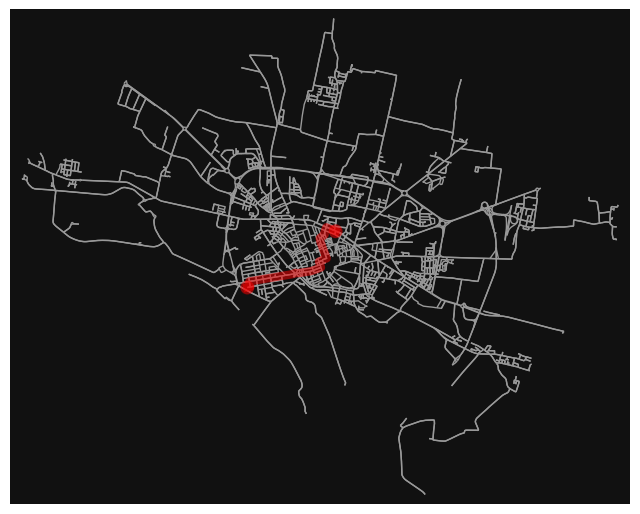

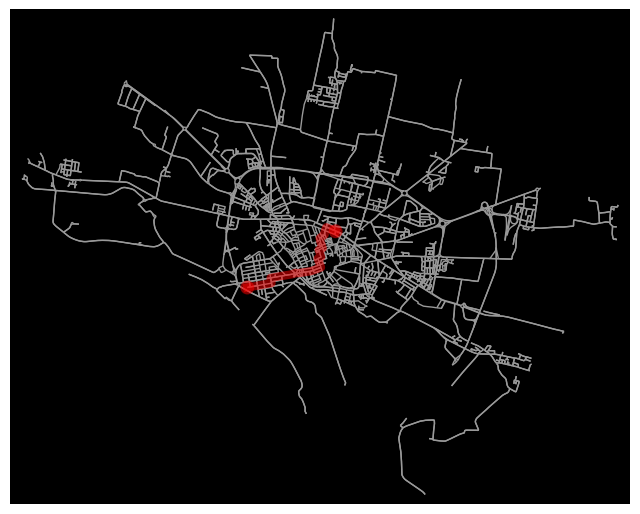

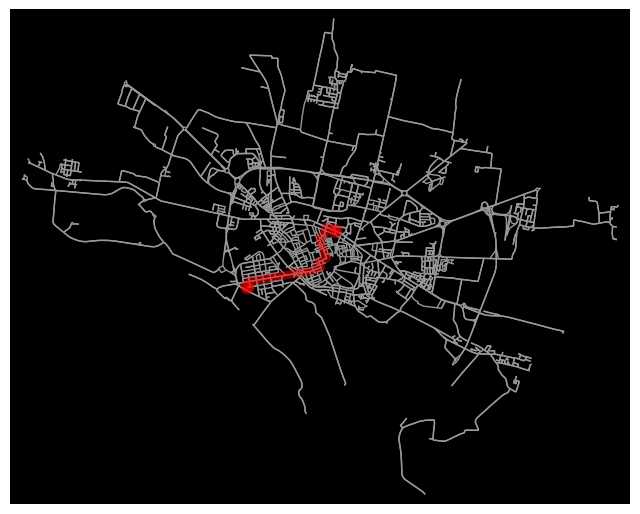

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [35]:
ox.plot_graph_route(prj_G, route_traffic, route_linewidth=6, node_size=0)
ox.plot_graph_route(prj_G, route, route_linewidth=6, node_size=0, bgcolor='k', route_color='r')
ox.plot_graph_route(prj_G, route2, route_linewidth=6, node_size=0, bgcolor='k', route_color='r')

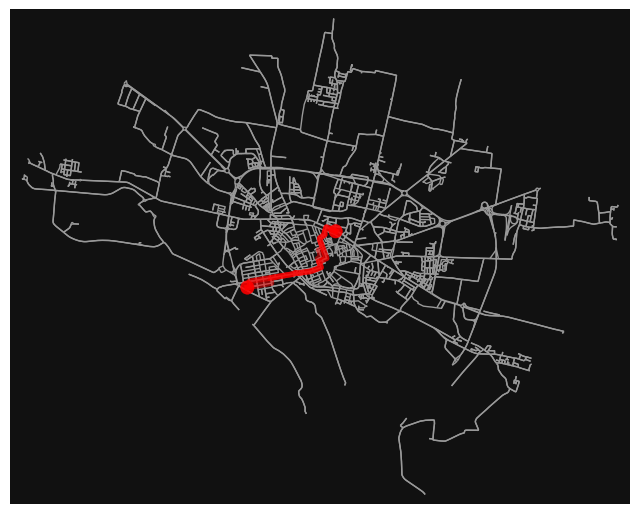

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [36]:
#plot all routes
all_routes = [route, route2, route_traffic]
ox.plot_graph_routes(prj_G_traffic, all_routes, route_color='r', route_linewidth=6, node_size=0)


In [37]:
# Length of the route
routegdf_traffic = ox.routing.route_to_gdf(prj_G_traffic, route_traffic, weight='length')
lenght_traffic = int(routegdf_traffic['length'].sum())
print("The length of the route is: ", lenght_traffic, "m")


The length of the route is:  2874 m


In [38]:
# time of the route
time_traffic = int(routegdf_traffic['traffic_time'].sum())
print("The time of the route is: ", time_traffic, "s")

The time of the route is:  288 s


In [39]:
#export the route to GeoJSON
routegdf_traffic = routegdf_traffic.to_crs("EPSG:4326")
routegdf_traffic.to_file("route_traffic.geojson", driver='GeoJSON')

Looks like the **traffic** is not changing the route, time still has increased soooo I guess it is fine


### Let's add traffic lights


In [40]:
# search for traffic lights
traffic_lights = ox.features_from_place(place_name, tags={'highway':'traffic_signals'}, which_result=2)

In [41]:
traffic_lights.head()

geometry          highway crossing  \
element id                                                               
node    282022293  POINT (10.00656 45.14525)  traffic_signals      NaN   
        282024136  POINT (10.01853 45.14199)  traffic_signals      NaN   
        282024199   POINT (10.01561 45.1416)  traffic_signals      NaN   
        282024430   POINT (10.01897 45.1411)  traffic_signals      NaN   
        282025210    POINT (10.0185 45.1421)  traffic_signals      NaN   

                  traffic_signals traffic_signals:direction crossing_ref  \
element id                                                                 
node    282022293             NaN                       NaN          NaN   
        282024136             NaN                       NaN          NaN   
        282024199             NaN                       NaN          NaN   
        282024430             NaN                       NaN          NaN   
        282025210             NaN                       NaN          NaN   

                  bicycle button_operated segregated tactile_paving  
element id                                                           
node    282022293     NaN             NaN        NaN            NaN  
        282024136     NaN             NaN        NaN            NaN  
        282024199     NaN             NaN        NaN            NaN  
        282024430     NaN             NaN        NaN            NaN  
        282025210     NaN             NaN        NaN            NaN

<Axes: >

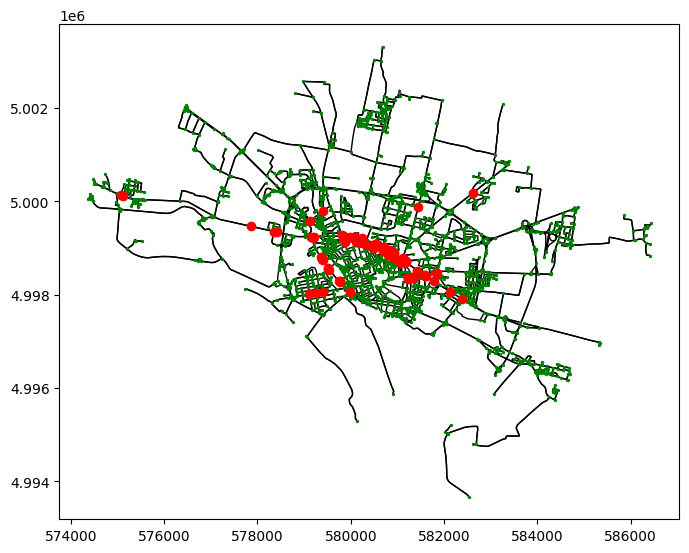

In [42]:
traffic_lights.to_crs(gdf_nodes.crs, inplace=True)
#plot
fig, ax = plt.subplots(figsize=(8,8))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
traffic_lights.plot(ax=ax, color='red', zorder=3)


This looks way more accurate then what I expected, crazy

In [43]:
# Let's add the traffic lights to the nodes
# find nearest node ALL IN ONCE
nearest_nodes = ox.distance.nearest_nodes(prj_G, traffic_lights.geometry.x, traffic_lights.geometry.y)
gdf_nodes['traffic_lights'] = gdf_nodes.index.isin(nearest_nodes)
### way more efficient

In [44]:
'''
Not efficient
# Let's add the traffic lights to the nodes
gdf_nodes['traffic_lights'] = False
for index, row in traffic_lights.iterrows():
    nearest_node = ox.distance.nearest_nodes(prj_G, row.geometry.x, row.geometry.y)
    gdf_nodes.loc[nearest_node, 'traffic_lights'] = True
'''

"\nNot efficient\n# Let's add the traffic lights to the nodes\ngdf_nodes['traffic_lights'] = False\nfor index, row in traffic_lights.iterrows():\n    nearest_node = ox.distance.nearest_nodes(prj_G, row.geometry.x, row.geometry.y)\n    gdf_nodes.loc[nearest_node, 'traffic_lights'] = True\n"

In [45]:
# traffic lights to the edges  ALL IN ONCE
gdf_edges.index.get_level_values(1)
gdf_edges['traffic_lights'] = gdf_edges.index.get_level_values(1).isin(gdf_nodes[gdf_nodes['traffic_lights']].index)


prj_G_traffic_lights = ox.graph_from_gdfs(gdf_nodes, gdf_edges)

gdf_edges.head()
# nice way of indexing ;)

osmid    highway    junction lanes  \
u         v         key                                          
249617125 302402633 0    27547575    primary  roundabout     2   
302402633 332198526 0    27547575    primary  roundabout     2   
          853019208 0    27706271    primary         NaN     2   
249617128 302402587 0    27547575    primary  roundabout     2   
          302415503 0    27548810  secondary         NaN   NaN   

                                    name       ref  oneway reversed  \
u         v         key                                               
249617125 302402633 0      Via Seminario  SPexSS10    True    False   
302402633 332198526 0      Via Seminario  SPexSS10    True    False   
          853019208 0      Via Seminario  SPexSS10    True    False   
249617128 302402587 0      Via Seminario  SPexSS10    True    False   
          302415503 0    Via Castelleone       NaN    True    False   

                             length  \
u         v         key               
249617125 302402633 0     53.534697   
302402633 332198526 0     67.514562   
          853019208 0    118.332108   
249617128 302402587 0     34.828924   
          302415503 0     43.788035   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (578681.931 5000032.907, 578678.414...   
302402633 332198526 0    LINESTRING (578679.422 4999980.367, 578686.185...   
          853019208 0    LINESTRING (578679.422 4999980.367, 578681.023...   
249617128 302402587 0    LINESTRING (578742.69 4999967.629, 578754.881 ...   
          302415503 0    LINESTRING (578742.69 4999967.629, 578758.493 ...   

                         ...  travel_time   edge_bc  maxspeed bridge tunnel  \
u         v         key  ...                                                  
249617125 302402633 0    ...     3.299485  0.257884       NaN    NaN    NaN   
302402633 332198526 0    ...     4.161102  0.197348       NaN    NaN    NaN   
          853019208 0    ...     7.293122  0.060564       NaN    NaN    NaN   
249617128 302402587 0    ...     2.146599  0.111161       NaN    NaN    NaN   
          302415503 0    ...     3.089139  0.158156       NaN    NaN    NaN   

                        width access traffic_speed  traffic_time  \
u         v         key                                            
249617125 302402633 0     NaN    NaN     47.866378      4.026311   
302402633 332198526 0     NaN    NaN     50.341538      4.828069   
          853019208 0     NaN    NaN     55.934287      7.616001   
249617128 302402587 0     NaN    NaN     53.865507      2.327726   
          302415503 0     NaN    NaN     45.380000      3.473709   

                         traffic_lights  
u         v         key                  
249617125 302402633 0             False  
302402633 332198526 0             False  
          853019208 0             False  
249617128 302402587 0             False  
          302415503 0             False  

[5 rows x 21 columns]

In [46]:
'''
prj_G_traffic_lights = ox.graph_from_gdfs(gdf_nodes, gdf_edges)

# let's create a new edge attribute that says if there is a traffic light in the following node
gdf_edges['traffic_lights'] = False
gdf_edges = gdf_edges.sort_index() # Otherwise, it will raise a warning of performance
for u, v,  data in prj_G_traffic_lights.edges(data=True): # REMEMBER THIS WAY OF INDEXING BECAUSE IT TOOK 2 HOURS
    if gdf_nodes.loc[v, 'traffic_lights']:
        gdf_edges.loc[(u,v), 'traffic_lights'] = True
'''

"\nprj_G_traffic_lights = ox.graph_from_gdfs(gdf_nodes, gdf_edges)\n\n# let's create a new edge attribute that says if there is a traffic light in the following node\ngdf_edges['traffic_lights'] = False\ngdf_edges = gdf_edges.sort_index() # Otherwise, it will raise a warning of performance\nfor u, v,  data in prj_G_traffic_lights.edges(data=True): # REMEMBER THIS WAY OF INDEXING BECAUSE IT TOOK 2 HOURS\n    if gdf_nodes.loc[v, 'traffic_lights']:\n        gdf_edges.loc[(u,v), 'traffic_lights'] = True\n"

<Axes: >

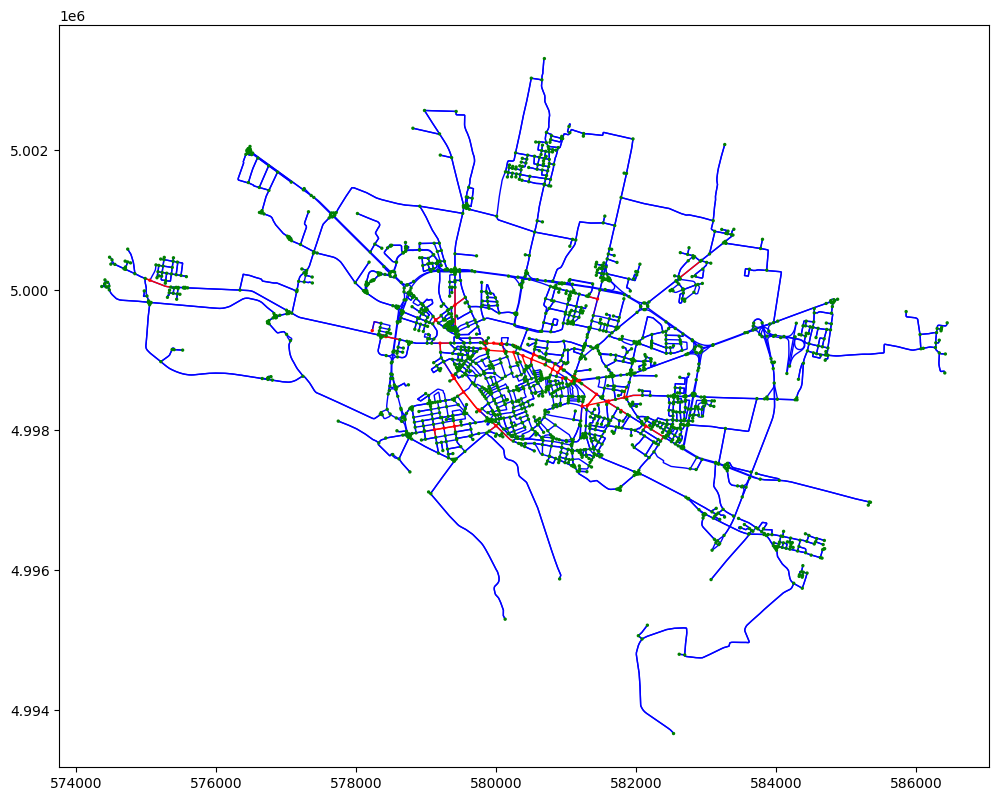

In [47]:
#plot traffic lights
nc = ['red' if node else 'green' for node in gdf_nodes['traffic_lights']]
ec = ['red' if edge else 'blue' for edge in gdf_edges['traffic_lights']]
fig, ax = plt.subplots(figsize=(12,12))
gdf_nodes.plot(ax=ax, color=nc, zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor=ec, zorder=1)


VERY NICE

In [48]:
# Let's add a velocity penalty for traffic lights to the existing traffic
gdf_edges['traffic_speed'] = gdf_edges['speed_kph']*(1-gdf_edges['edge_bc']*0.7)*(1-gdf_edges['traffic_lights']*0.2)
gdf_edges['traffic_time'] = gdf_edges['length'] / (gdf_edges['traffic_speed'] * 1000 / 3600)

gdf_edges.head()

osmid    highway    junction lanes  \
u         v         key                                          
249617125 302402633 0    27547575    primary  roundabout     2   
302402633 332198526 0    27547575    primary  roundabout     2   
          853019208 0    27706271    primary         NaN     2   
249617128 302402587 0    27547575    primary  roundabout     2   
          302415503 0    27548810  secondary         NaN   NaN   

                                    name       ref  oneway reversed  \
u         v         key                                               
249617125 302402633 0      Via Seminario  SPexSS10    True    False   
302402633 332198526 0      Via Seminario  SPexSS10    True    False   
          853019208 0      Via Seminario  SPexSS10    True    False   
249617128 302402587 0      Via Seminario  SPexSS10    True    False   
          302415503 0    Via Castelleone       NaN    True    False   

                             length  \
u         v         key               
249617125 302402633 0     53.534697   
302402633 332198526 0     67.514562   
          853019208 0    118.332108   
249617128 302402587 0     34.828924   
          302415503 0     43.788035   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (578681.931 5000032.907, 578678.414...   
302402633 332198526 0    LINESTRING (578679.422 4999980.367, 578686.185...   
          853019208 0    LINESTRING (578679.422 4999980.367, 578681.023...   
249617128 302402587 0    LINESTRING (578742.69 4999967.629, 578754.881 ...   
          302415503 0    LINESTRING (578742.69 4999967.629, 578758.493 ...   

                         ...  travel_time   edge_bc  maxspeed bridge tunnel  \
u         v         key  ...                                                  
249617125 302402633 0    ...     3.299485  0.257884       NaN    NaN    NaN   
302402633 332198526 0    ...     4.161102  0.197348       NaN    NaN    NaN   
          853019208 0    ...     7.293122  0.060564       NaN    NaN    NaN   
249617128 302402587 0    ...     2.146599  0.111161       NaN    NaN    NaN   
          302415503 0    ...     3.089139  0.158156       NaN    NaN    NaN   

                        width access traffic_speed  traffic_time  \
u         v         key                                            
249617125 302402633 0     NaN    NaN     47.866378      4.026311   
302402633 332198526 0     NaN    NaN     50.341538      4.828069   
          853019208 0     NaN    NaN     55.934287      7.616001   
249617128 302402587 0     NaN    NaN     53.865507      2.327726   
          302415503 0     NaN    NaN     45.380000      3.473709   

                         traffic_lights  
u         v         key                  
249617125 302402633 0             False  
302402633 332198526 0             False  
          853019208 0             False  
249617128 302402587 0             False  
          302415503 0             False  

[5 rows x 21 columns]

In [49]:
# shortest path
prj_G_traffic_lights = ox.graph_from_gdfs(gdf_nodes, gdf_edges)
route_traffic_lights = nx.shortest_path(prj_G_traffic_lights, start, arrive, weight='traffic_time')
route_edges_traffic_lights = list(zip(route_traffic_lights, route_traffic_lights[1:]))


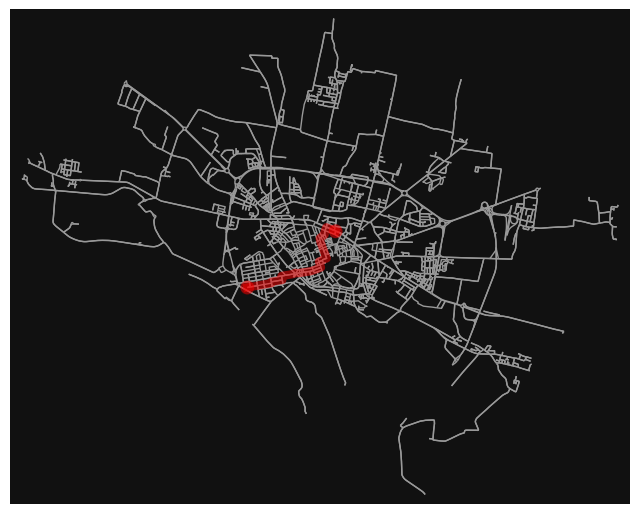

The length of the route is:  2873 m
The time of the route is:  296 s


In [50]:
ox.plot_graph_route(prj_G_traffic_lights, route_traffic_lights, route_linewidth=6, node_size=0)
# Length of the route
routegdf_traffic_lights = ox.routing.route_to_gdf(prj_G_traffic_lights, route_traffic_lights, weight='length')
lenght_traffic_lights = int(routegdf_traffic_lights['length'].sum())
print("The length of the route is: ", lenght_traffic_lights, "m")
time_traffic_lights = int(routegdf_traffic_lights['traffic_time'].sum())
print("The time of the route is: ", time_traffic_lights, "s")


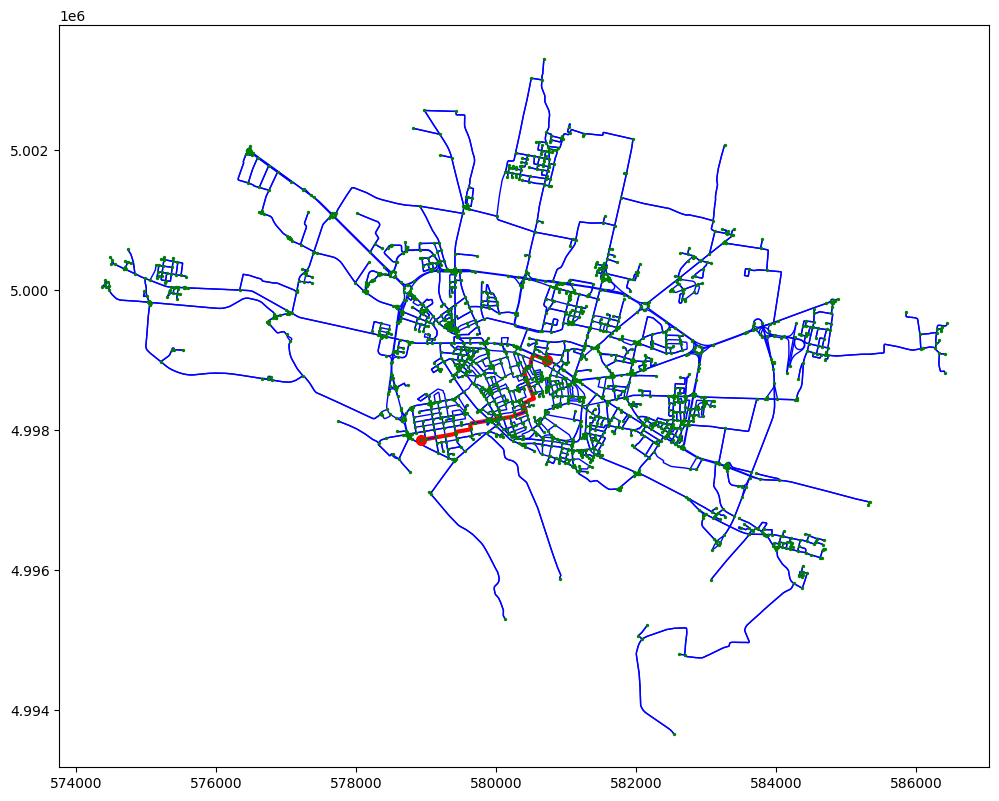

In [51]:
ec_traffic_lights = ['r' if edge in routegdf_traffic_lights.index else 'blue' for edge in gdf_edges.index]
es_traffic_lights = [3 if edge in routegdf_traffic_lights.index else 1 for edge in gdf_edges.index]
#plot
fig, ax = plt.subplots(figsize=(12,12))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=es_traffic_lights, edgecolor= ec_traffic_lights, zorder=1)
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)



In [52]:
#export the route to GeoJSON
routegdf_traffic_lights = routegdf_traffic_lights.to_crs("EPSG:4326")
routegdf_traffic_lights.to_file("route_traffic_lights.geojson", driver='GeoJSON')

Maybe this makes absolutely no sense, but it is funny
### Restricted traffic areas


In [53]:
# let's create a circle around the city center which is a restricted traffic area
center_lat, center_lon = 45.13421, 10.02455
center_point = shapely.geometry.Point(center_lon, center_lat)
center_point_gdf = gpd.GeoDataFrame(geometry=[center_point], crs="EPSG:4326")
center_point_gdf = center_point_gdf.to_crs(gdf_nodes.crs)
# add a buffer of 500 meters
buffer = center_point_gdf.buffer(300)



<Axes: >

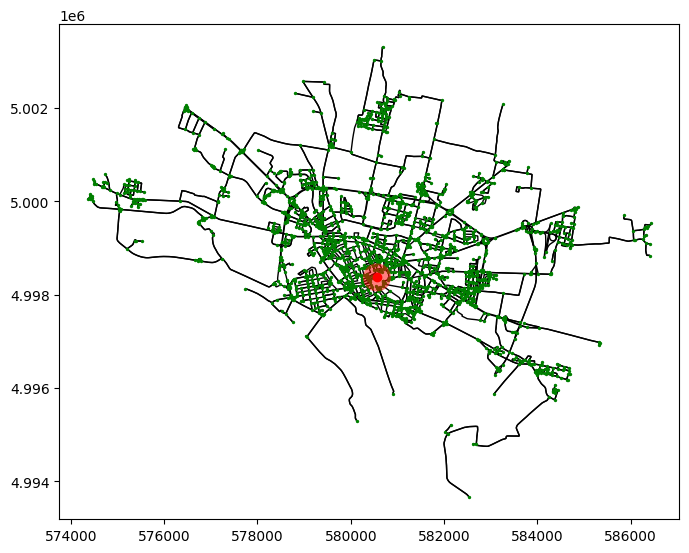

In [54]:
f, ax = plt.subplots(figsize=(8,8))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
center_point_gdf.plot(ax=ax, color='red', zorder=3)
buffer.plot(ax=ax, color='red', alpha=0.5, zorder=3)

Perfect, now the restricted area is the red circle, I have to make it inaccesible

### Filter nodes and edges that are not within the buffer
Ok so in order to remember what is going on:
2 ways of filtering:
- *Using the within() function:* 

    selecting the nodes and edges in one line, looks good BUT then it is needed to filter the edges that have a missing node
- *Using the clip() function:*

    maybe one more step because we have both clip() and isin() but it avoids the missing node problem

In [55]:
# Filter nodes and edges that are not within the buffer
gdf_nodes_ztl = gdf_nodes[~gdf_nodes.geometry.within(buffer.geometry[0])]
gdf_edges_ztl = gdf_edges[~gdf_edges.geometry.within(buffer.geometry[0])]

# Ensure all edges are valid
gdf_edges_ztl = gdf_edges_ztl[gdf_edges_ztl.is_valid]

<Axes: >

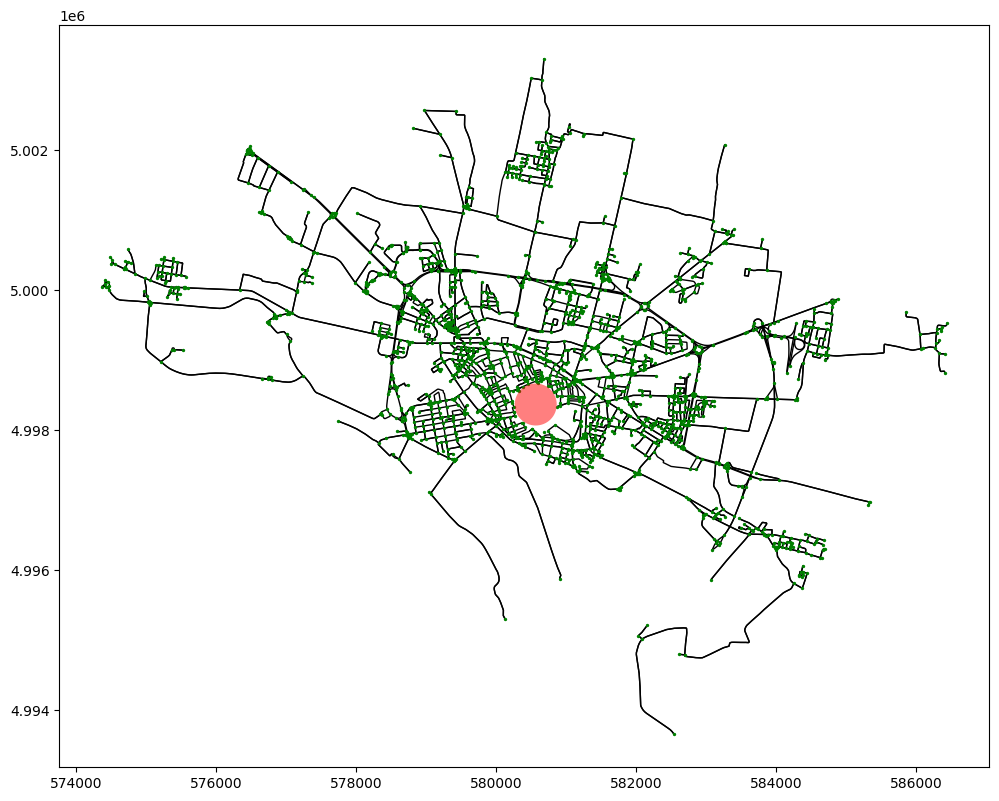

In [56]:
#alternative way of filtering, using clip() {Thanks Thomas}
#exclude nodes and edges that are within the buffer
gdf_nodes_clip = gdf_nodes.clip(buffer.geometry[0])
gdf_edges_clip = gdf_edges.clip(buffer.geometry[0])

gdf_nodes_ztl = gdf_nodes[~gdf_nodes.index.isin(gdf_nodes_clip.index)]
gdf_edges_ztl = gdf_edges[~gdf_edges.index.isin(gdf_edges_clip.index)]



#plot
fig, ax = plt.subplots(1 , 1, figsize=(12,12))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
#center_point_gdf.plot(ax=ax, color='red', zorder=3)
buffer.plot(ax=ax, color='red', alpha=0.5, zorder=3)


In [57]:
'''
Less efficient, because we have apply lambda function for each row

# I want a new graph without the buffer

gdf_nodes_ztl = gdf_nodes[gdf_nodes.apply(lambda x: x.geometry.within(buffer.geometry[0]), axis=1) == False]
gdf_edges_ztl = gdf_edges[gdf_edges.apply(lambda x: x.geometry.within(buffer.geometry[0]), axis=1) == False]
gdf_edges_ztl = gdf_edges_ztl[gdf_edges_ztl.is_valid]
'''

'\nLess efficient, because we have apply lambda function for each row\n\n# I want a new graph without the buffer\n\ngdf_nodes_ztl = gdf_nodes[gdf_nodes.apply(lambda x: x.geometry.within(buffer.geometry[0]), axis=1) == False]\ngdf_edges_ztl = gdf_edges[gdf_edges.apply(lambda x: x.geometry.within(buffer.geometry[0]), axis=1) == False]\ngdf_edges_ztl = gdf_edges_ztl[gdf_edges_ztl.is_valid]\n'

In [58]:
#check for edges with a missing node
u = set(gdf_edges_ztl.index.get_level_values(0))
v = set(gdf_edges_ztl.index.get_level_values(1))
missing_nodes = u.union(v) - set(gdf_nodes_ztl.index)
print(missing_nodes)
#find the edges that miss a node in the beginning or the end
gdf_edges_ztl = gdf_edges_ztl[gdf_edges_ztl.index.get_level_values(0).isin(gdf_nodes_ztl.index) & gdf_edges_ztl.index.get_level_values(1).isin(gdf_nodes_ztl.index)] 

set()


<Axes: >

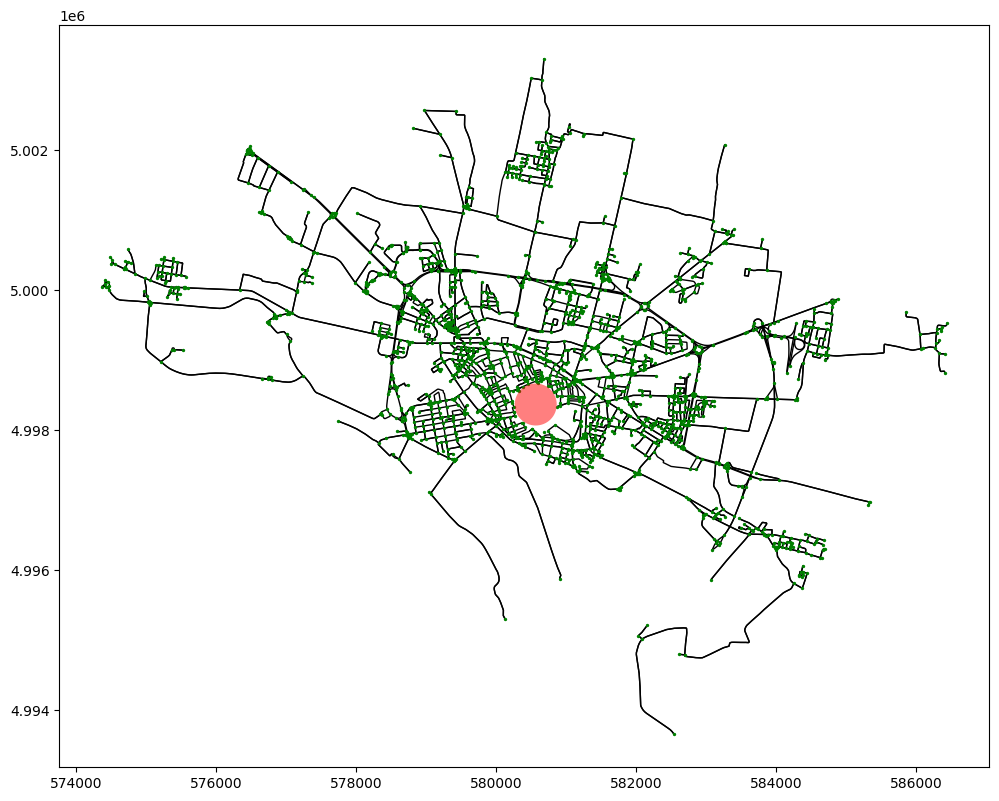

In [59]:
#plot
fig, ax = plt.subplots(1 , 1, figsize=(12,12))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
#center_point_gdf.plot(ax=ax, color='red', zorder=3)
buffer.plot(ax=ax, color='red', alpha=0.5, zorder=3)

In [60]:
# Let's create a new graph
prj_G_ztl = ox.graph_from_gdfs(gdf_nodes_ztl, gdf_edges_ztl )
#route
route_ztl = nx.shortest_path(prj_G_ztl, start, arrive, weight='traffic_time')
routegdf_ztl = ox.routing.route_to_gdf(prj_G_ztl, route_ztl, weight='length')

The time of the route is:  400 s


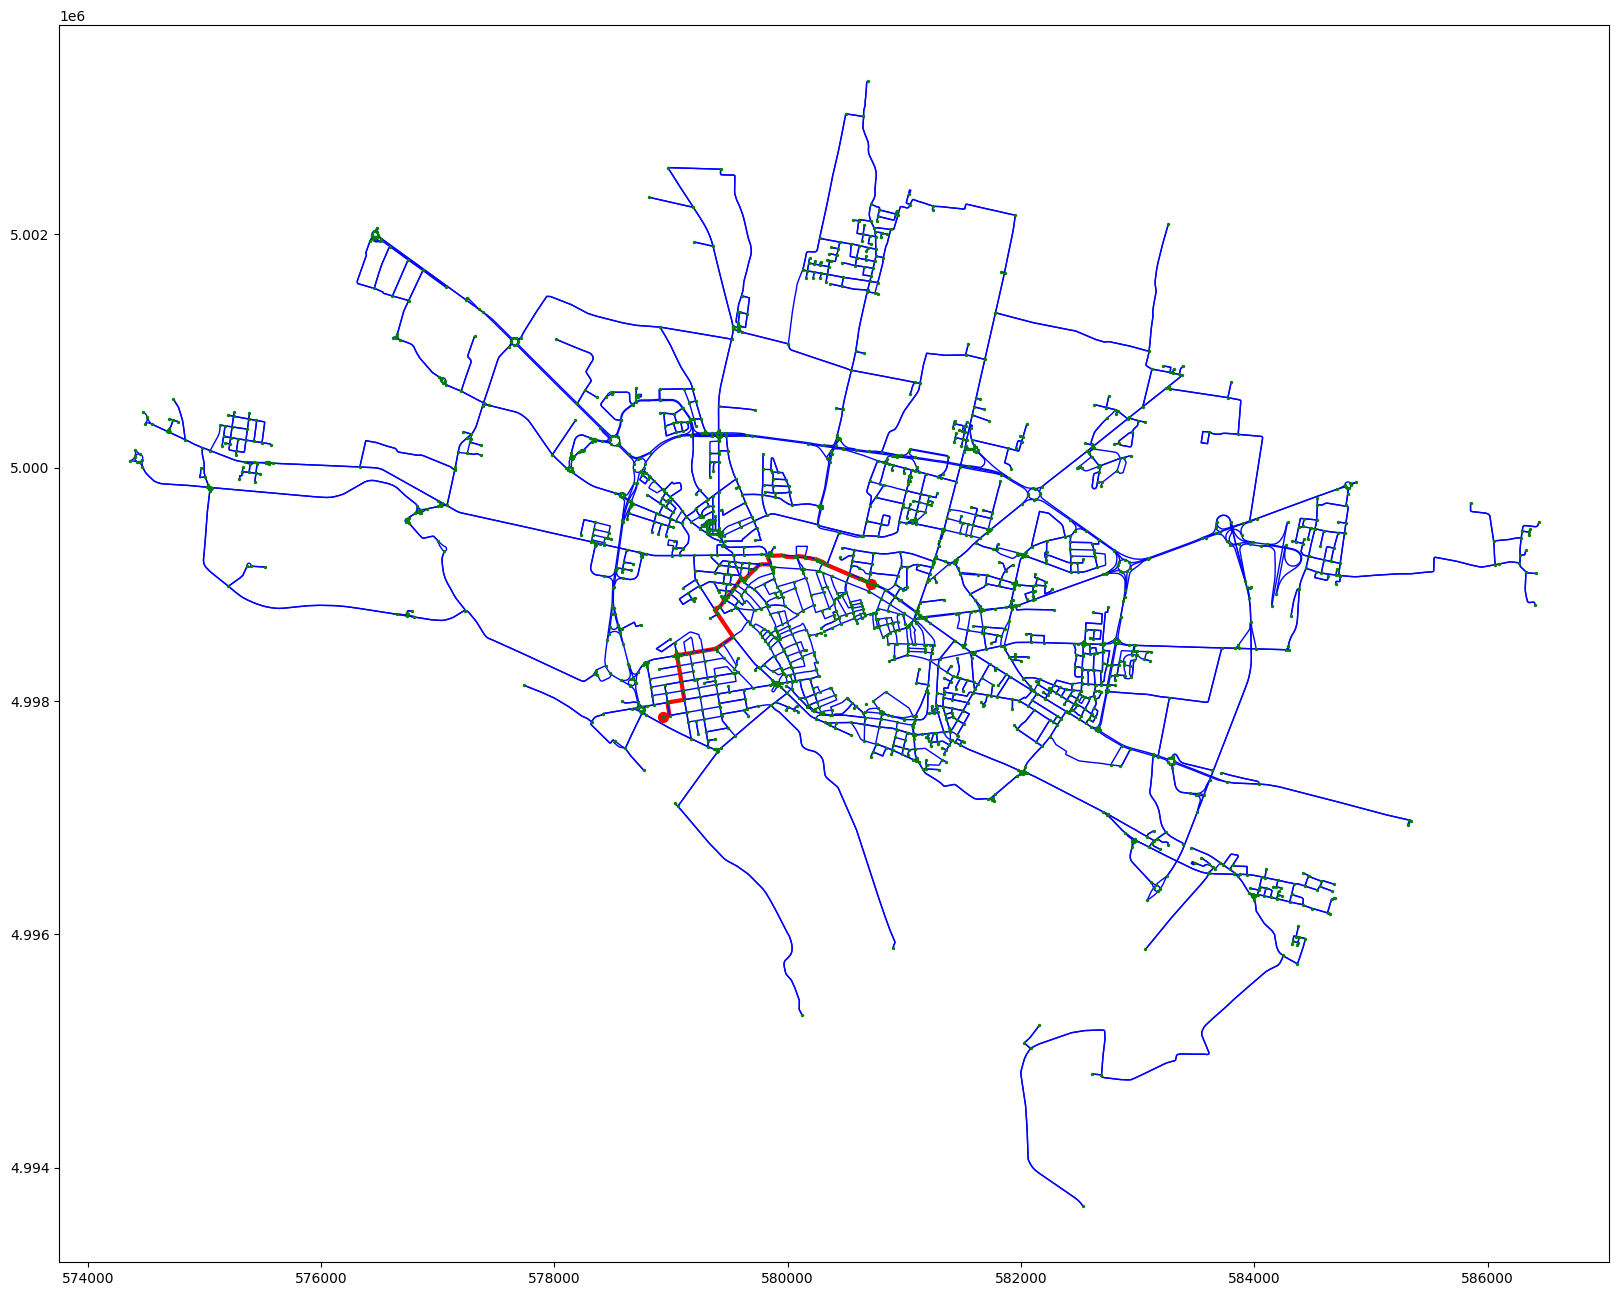

In [61]:
#plot
ec_ztl = ['r' if edge in routegdf_ztl.index else 'blue' for edge in gdf_edges_ztl.index]
es_ztl = [3 if edge in routegdf_ztl.index else 1 for edge in gdf_edges_ztl.index]

fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=es_ztl, edgecolor= ec_ztl, zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)

time_ztl = int(routegdf_ztl['traffic_time'].sum())
print("The time of the route is: ", time_ztl, "s")

Actually, very solid results!

In [62]:
# Length and time
lenght_ztl = int(routegdf_ztl['length'].sum())
print("The length of the route is: ", lenght_ztl, "m")
time_ztl = int(routegdf_ztl['traffic_time'].sum())
print("The time of the route is: ", time_ztl, "s")

The length of the route is:  3244 m
The time of the route is:  400 s


In [63]:
#export 
routegdf_ztl = routegdf_ztl.to_crs("EPSG:4326")
routegdf_ztl.to_file("route_ztl.geojson", driver='GeoJSON')

<Axes: >

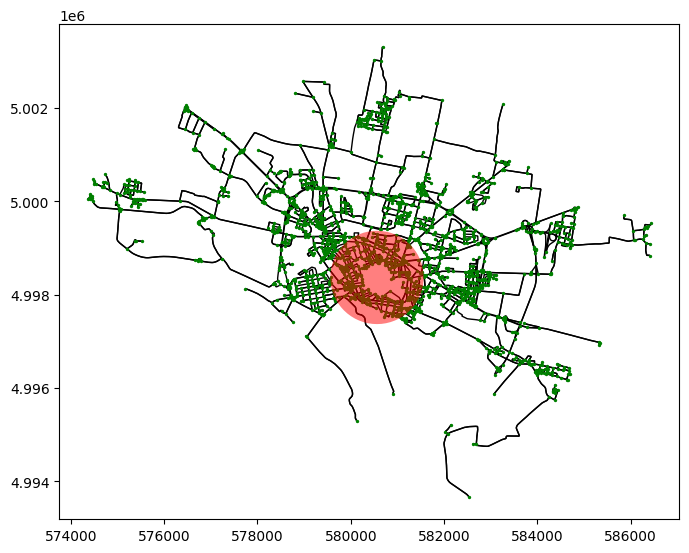

In [64]:
# Let's see if I can increase the traffic of the city center
buffer_traffic = center_point_gdf.buffer(1000)
#plot
fig, ax = plt.subplots(figsize=(8,8))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
buffer_traffic.plot(ax=ax, color='red', alpha=0.5, zorder=3)

Once again we have a red circle, but this time it is a traffic center, we can use either within() or clip() to filter the nodes and edges

In [65]:
gdf_edges_clip = gdf_edges_ztl.clip(buffer_traffic.geometry[0])

gdf_edges_ztl['traffic_center'] = gdf_edges_ztl.index.isin(gdf_edges_clip.index)
print(gdf_edges_ztl['traffic_center'].sum())
print(sum(gdf_edges_ztl['traffic_center'] == 0))


933
3746


In [66]:
'''
# create a new column in the edges that says if the edge is in the buffer_traffic
gdf_edges_ztl['traffic_center'] = False
gdf_edges_ztl = gdf_edges_ztl.sort_index()

gdf_edges_ztl['traffic_center'] = gdf_edges_ztl.apply(lambda x: x.geometry.within(buffer_traffic.geometry[0]), axis=1)

gdf_edges_ztl['traffic_center'].sum()
'''

"\n# create a new column in the edges that says if the edge is in the buffer_traffic\ngdf_edges_ztl['traffic_center'] = False\ngdf_edges_ztl = gdf_edges_ztl.sort_index()\n\ngdf_edges_ztl['traffic_center'] = gdf_edges_ztl.apply(lambda x: x.geometry.within(buffer_traffic.geometry[0]), axis=1)\n\ngdf_edges_ztl['traffic_center'].sum()\n"

In [67]:
# Let's add a velocity penalty for traffic lights to the existing traffic
gdf_edges_ztl['traffic_speed'] = gdf_edges_ztl['speed_kph']*(1-gdf_edges_ztl['edge_bc']*0.7)*(1-gdf_edges_ztl['traffic_lights']*0.2)*(1-gdf_edges_ztl['traffic_center']*0.7)
gdf_edges_ztl['traffic_time'] = gdf_edges_ztl['length'] / (gdf_edges_ztl['traffic_speed'] * 1000 / 3600)

In [68]:
# shortest path
prj_G_ztl_traffic = ox.graph_from_gdfs(gdf_nodes_ztl, gdf_edges_ztl)
route_ztl_traffic = nx.shortest_path(prj_G_ztl_traffic, start, arrive, weight='traffic_time')
routegdf_ztl = ox.routing.route_to_gdf(prj_G_ztl_traffic, route_ztl_traffic, weight='length')

The time of the route is:  670 s


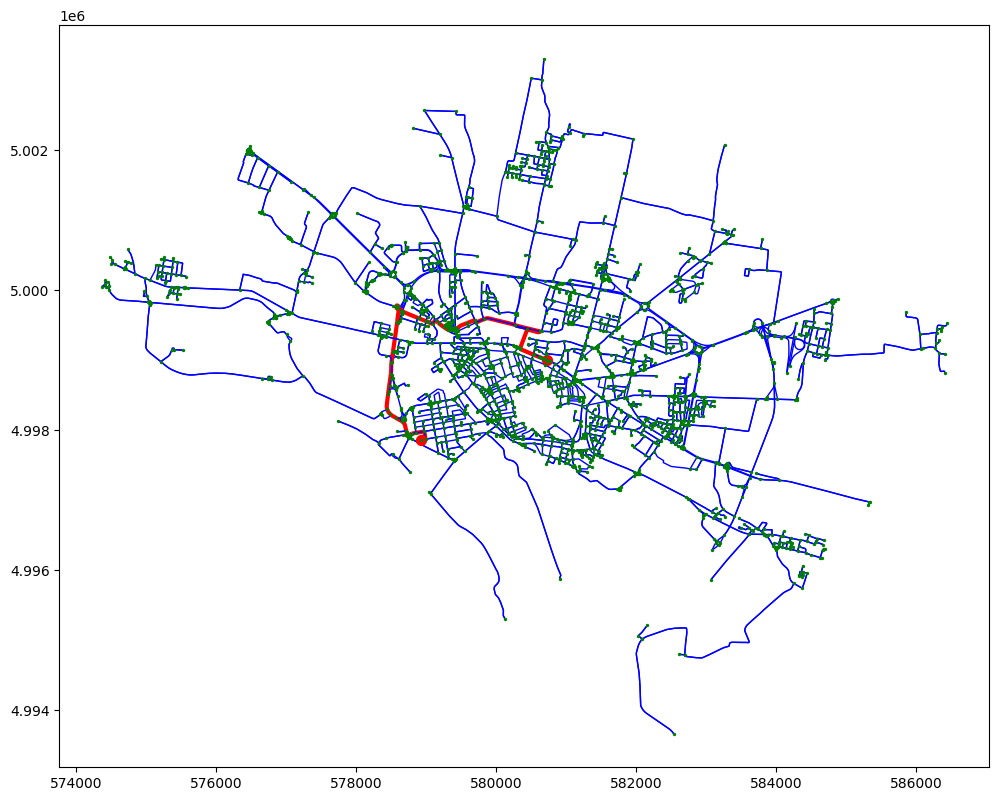

In [69]:
#plot
ec_ztl_traffic = ['r' if edge in routegdf_ztl.index else 'blue' for edge in gdf_edges_ztl.index]
es_ztl_traffic = [3 if edge in routegdf_ztl.index else 1 for edge in gdf_edges_ztl.index]

fig, ax = plt.subplots(figsize=(12,12))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=es_ztl_traffic, edgecolor= ec_ztl_traffic, zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)

time_ztl = int(routegdf_ztl['traffic_time'].sum())
print("The time of the route is: ", time_ztl, "s")

In [70]:
routegdf_ztl['traffic_speed'].mean()

41.35675903988896

In [71]:
#export
routegdf_ztl = routegdf_ztl.to_crs("EPSG:4326")
routegdf_ztl.to_file("route_ztl_traffic.geojson", driver='GeoJSON')

In [72]:
# start and arrive swapped
route_ztl_traffic_reverse = nx.shortest_path(prj_G_ztl_traffic, arrive, start, weight='traffic_time')
routegdf_ztl_reverse = ox.routing.route_to_gdf(prj_G_ztl_traffic, route_ztl_traffic_reverse, weight='length')

The time of the route is:  671 s


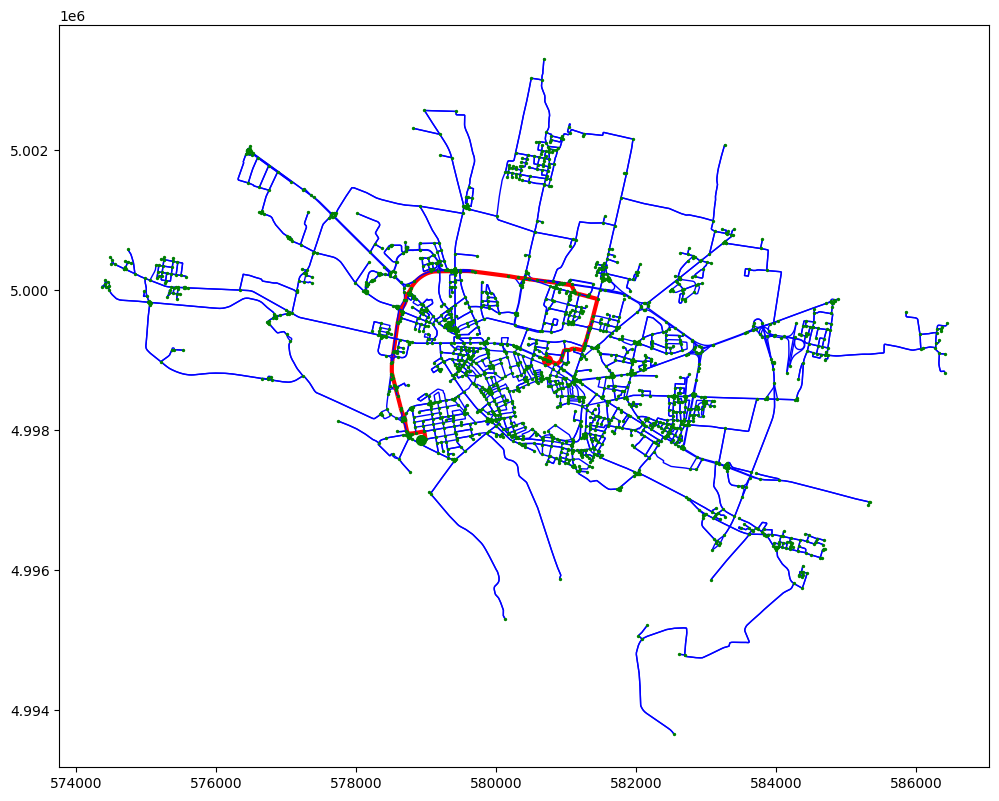

In [73]:
#plot
ec_ztl_traffic_reverse = ['r' if edge in routegdf_ztl_reverse.index else 'blue' for edge in gdf_edges_ztl.index]
es_ztl_traffic_reverse = [3 if edge in routegdf_ztl_reverse.index else 1 for edge in gdf_edges_ztl.index]

fig, ax = plt.subplots(figsize=(12,12))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=es_ztl_traffic_reverse, edgecolor= ec_ztl_traffic_reverse, zorder=1)

ax.scatter(arrive_node['x'], arrive_node['y'], color='green', s=50)
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)

time_ztl_reverse = int(routegdf_ztl_reverse['traffic_time'].sum())
print("The time of the route is: ", time_ztl_reverse, "s")



In [74]:
#export
routegdf_ztl_reverse = routegdf_ztl_reverse.to_crs("EPSG:4326")
routegdf_ztl_reverse.to_file("route_ztl_traffic_reverse.geojson", driver='GeoJSON')

I very like this road, but let's try to change start and arrive points


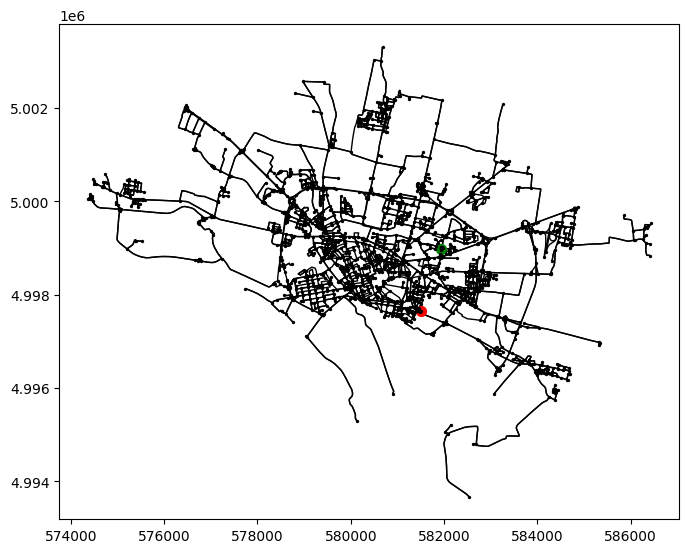

In [75]:
#randomly pickiing a node
random_start = np.random.choice(gdf_nodes.index)
random_start_node = gdf_nodes.loc[random_start]

random_arrive = np.random.choice(gdf_nodes.index)
random_arrive_node = gdf_nodes.loc[random_arrive]

f , ax = plt.subplots(figsize=(8,8))
gdf_nodes.plot(ax=ax, color='black', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
ax.scatter(random_start_node['x'], random_start_node['y'], color='green', s=50)
ax.scatter(random_arrive_node['x'], random_arrive_node['y'], color='red', s=50)


The length of the route is:  1824 m
The time of the route is:  187 s
The average speed of the route is:  36.99005563591345 km/h


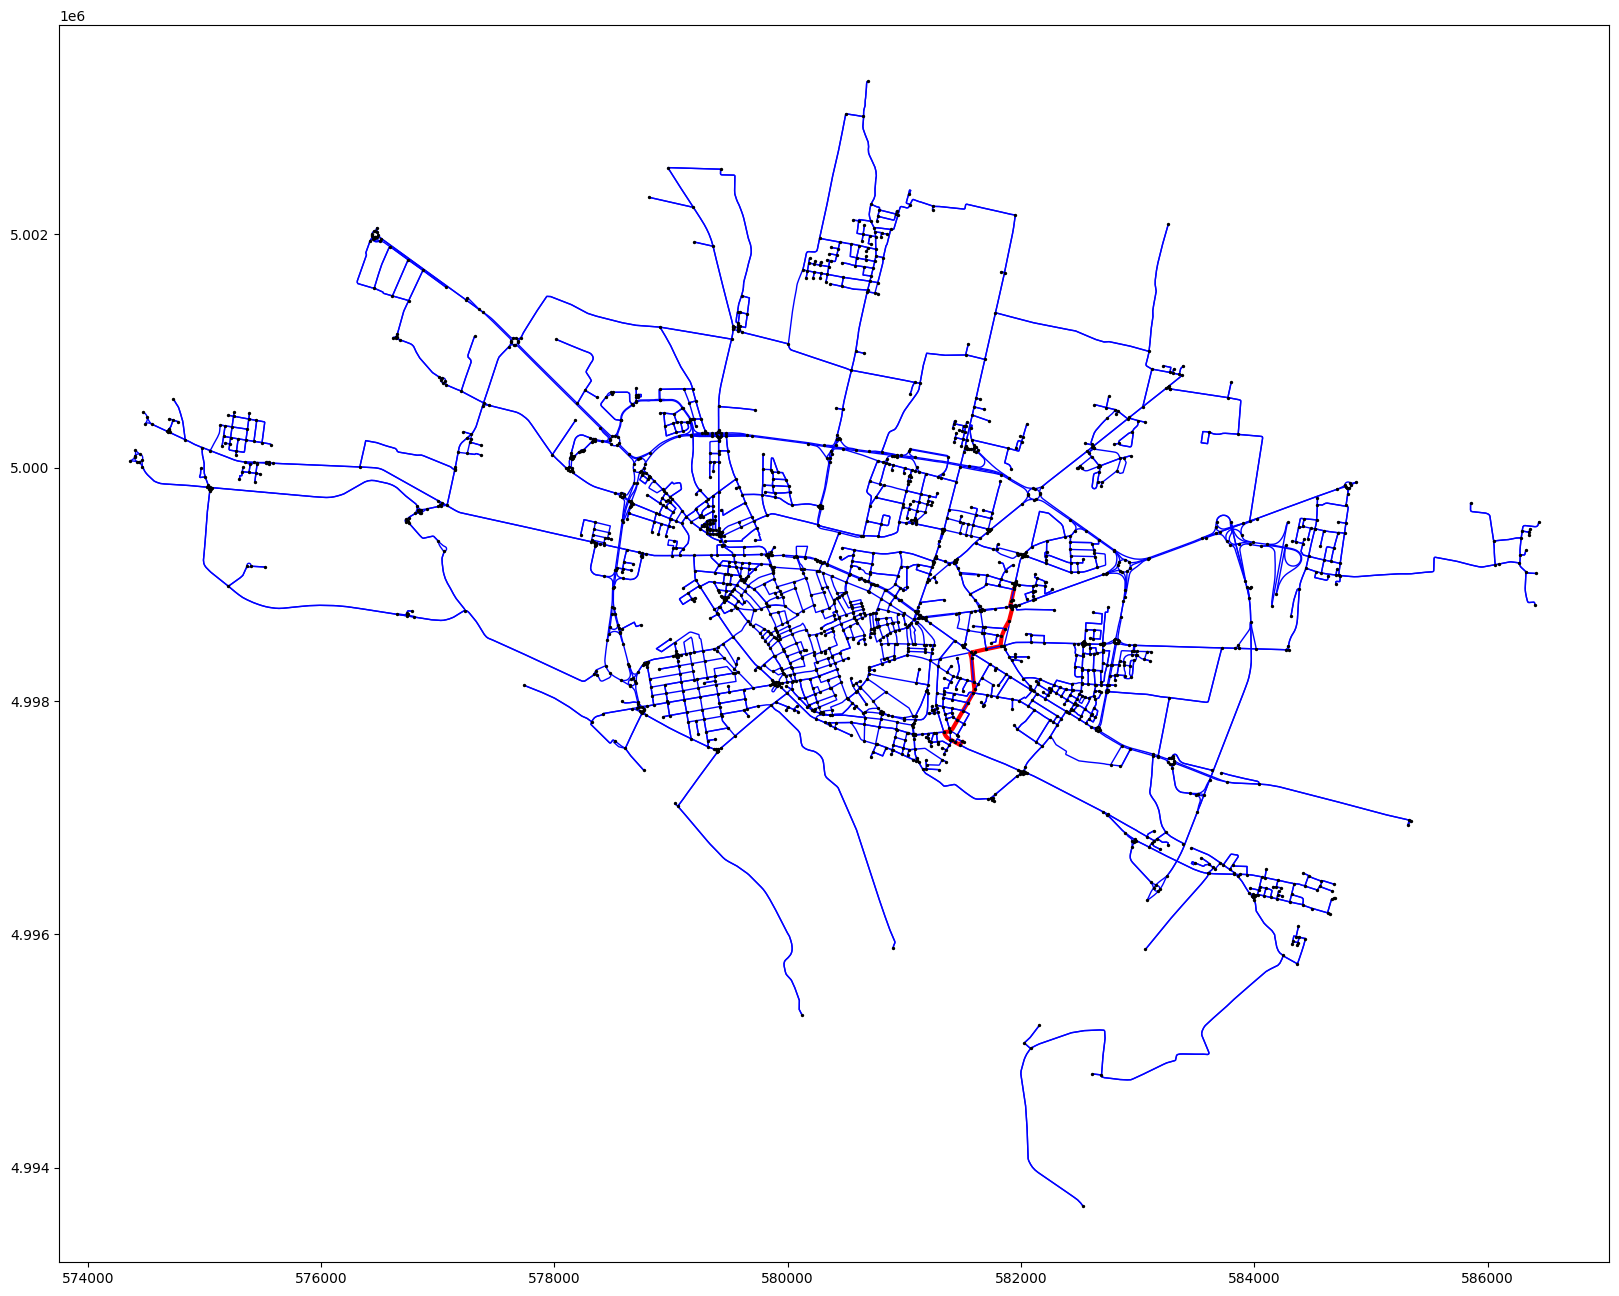

In [76]:
# shortest path
route_random = nx.shortest_path(prj_G_ztl_traffic, random_start, random_arrive, weight='traffic_time')
routegdf_random = ox.routing.route_to_gdf(prj_G_ztl_traffic, route_random, weight='length')


ec_random = ['r' if edge in routegdf_random.index else 'blue' for edge in gdf_edges.index]
es_random = [3 if edge in routegdf_random.index else 1 for edge in gdf_edges.index]

f, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='black', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth= es_random, edgecolor=ec_random, zorder=1)

r_len = int(routegdf_random['length'].sum())
r_time = int(routegdf_random['traffic_time'].sum())
avg_speed = routegdf_random['traffic_speed'].mean()

print("The length of the route is: ", r_len, "m")
print("The time of the route is: ", r_time, "s")
print("The average speed of the route is: ", avg_speed, "km/h")

In [77]:
#bbox that surrounds the route 
route_gdf = gdf_edges.loc[routegdf_random.index]


minx, miny, maxx, maxy = route_gdf.total_bounds
print(minx, miny, maxx, maxy)
#add a bit of margin
minx = minx*0.999
miny = miny*0.9999
maxx = maxx*1.001
maxy = maxy*1.0001






581338.3352585613 4997622.604149941 581942.5378189394 4998975.077649977


(4997122.841889527, 4999474.975157742)

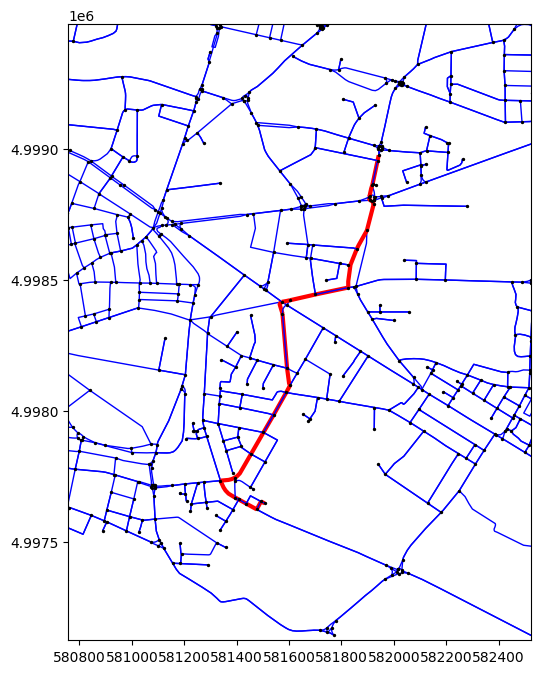

In [78]:
#plot 
f, ax = plt.subplots(figsize=(8,8))
gdf_nodes.plot(ax=ax, color='black', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth= es_random, edgecolor=ec_random, zorder=1)


ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


# Let's try something a bit unconventional...GNN time
### Disclaimer: This is a training exercise, I understand that I'm using a model to predict something that is completely fabricated by me


In [146]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.transforms as T
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from torch_geometric.data import InMemoryDataset, Data
import torch_geometric
from torch_geometric.nn import GATv2Conv

In [139]:
# Preprocess the data and prepare the dataset
nodes_gnn = gdf_nodes_ztl.copy()
edges_gnn = gdf_edges_ztl.copy()

X = nodes_gnn.drop(columns= ['geometry', 'junction', 'highway'])

X = np.array(X.values)
X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(2230, 5)

In [140]:
Y = edges_gnn['traffic_speed'].values
Y = np.array(Y)

In [141]:
# Prepare edge index 
node_to_id = {}
for i, node in enumerate(nodes_gnn.index):
    node_to_id[node] = i
    
start_node = [node_to_id[i[0]] for i in edges_gnn.index]
end_node = [node_to_id[i[1]] for i in edges_gnn.index]
start = torch.tensor(start_node, dtype=torch.long)
end = torch.tensor(end_node, dtype=torch.long)
edge_index = torch.stack([start, end], dim=0)

In [159]:
# Create dataset for node prediction
class CremonaDataset(InMemoryDataset):
    def __init__(self, edge_index, x, y, transform=None):
        super(CremonaDataset, self).__init__('.', transform, None, None)
        
        # Create data object
        data = Data(x=torch.FloatTensor(x), 
                   y=torch.FloatTensor(y), 
                   edge_index=edge_index)
        
        # Set number of nodes and features
        data.num_nodes = x.shape[0]
        data.num_features = x.shape[1]
        
        # Split data into train/val/test sets (70%/15%/15%)
        np.random.seed(0)
        n_nodes = data.num_nodes
        n_edges = edge_index.shape[1]
        indices = np.random.permutation(n_edges)
        #print(n_nodes) #debug
        
        train_idx = indices[:int(0.7 * n_edges)]
        #print(len(train_idx)) #debug
        val_idx = indices[int(0.7 * n_edges):int(0.85 * n_edges)]
        test_idx = indices[int(0.85 * n_edges):]
        
        # Create masks
        train_mask = torch.zeros(n_edges, dtype=torch.bool)
        val_mask = torch.zeros(n_edges, dtype=torch.bool)
        test_mask = torch.zeros(n_edges, dtype=torch.bool)
        
        train_mask[train_idx] = True
        val_mask[val_idx] = True
        test_mask[test_idx] = True
        
        data.train_mask = train_mask    #size is still all nodes but only True for train nodes
        data.val_mask = val_mask
        data.test_mask = test_mask
        
        self.data, self.slices = self.collate([data])
        
        print("Dataset created with {} nodes".format(data.num_nodes), "and {} edges".format(edge_index.shape[1]))
    
    def _download(self):
        return
    
    def _process(self):
        return
    
    
# Set torch device to cuda if available or else cpu
#device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

dataset = CremonaDataset(edge_index, X_scaled, Y)
data = dataset[0].to(device)

cpu
Dataset created with 2230 nodes and 4679 edges


In [173]:
# Define hyperparameters
HIDDEN_DIM = 32
LR = 0.01
EPOCHS = 1000

class GATv2(torch.nn.Module):
    def __init__(self, hidden_layer, data, output_dim = 1 , heads=4):
        super(GATv2, self).__init__()
        self.gat1 = GATv2Conv(data.num_features, hidden_layer, heads=heads)
        self.gat2 = GATv2Conv(hidden_layer*heads, hidden_layer, heads=1)
        self.linear = nn.Linear(hidden_layer*2, output_dim)

    def forward(self, data):
        # Get node features and edge index
        x, edge_index = data.x, data.edge_index
        
        # First layer
        out= self.gat1(x, edge_index)
        out = F.elu(out)
        out = F.dropout(out, p= 0.5, training=self.training)
        
        # Second layer
        out = self.gat2(out, edge_index)
        
        src, dst = edge_index   # src and dst are the start and end nodes of the edges
        out = torch.concat((out[src], out[dst]), dim=1)  # Concatenate the features of the start and end nodes
        
        # Final layer
        out = self.linear(out)
        
        
        return out

# Initialise GCN model instance
model = GATv2(HIDDEN_DIM, data).to(device) 
print(model)

GATv2(
  (gat1): GATv2Conv(5, 32, heads=4)
  (gat2): GATv2Conv(128, 32, heads=1)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)


In [174]:
# Define loss and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=20)

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    # Forward pass
    out = model(data)
    # Compute loss (only on training nodes)
    loss = criterion(out[data.train_mask].squeeze(), data.y[data.train_mask]) # squeeze() to remove extra dimension
    # Backward pass
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluation function
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out[mask].squeeze()
        true = data.y[mask]
        loss = criterion(pred, true)
    return loss.item()


In [175]:
out = model(data)
out[data.train_mask].squeeze()

tensor([-0.4943, -0.5369, -0.2301,  ..., -0.0649, -0.0267, -0.5066],
       grad_fn=<SqueezeBackward0>)

In [176]:
# Training loop
best_loss = float('inf')
early_stop_counter = 0
early_stop_patience = 30
train_losses, val_losses = [], []

print(f"Starting training on {device}...")
for epoch in range(1, EPOCHS + 1):
    # Train
    train_loss = train()
    train_losses.append(train_loss)
    
    # Evaluate on validation set
    val_loss = evaluate(data.val_mask)
    val_losses.append(val_loss)
    
    # Adjust learning rate
    scheduler.step(val_loss)
    
    # Early stopping check
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'best_CR_gat.pt')
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        
        
    
    # Print progress
    if epoch % 10 == 0:
        test_loss  = evaluate(data.test_mask)
        print(f'Epoch: {epoch:03d}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
              f'Test Loss: {test_loss:.4f}, ')
        
    # Check for early stopping
    if early_stop_counter >= early_stop_patience:
        print(f"Early stopping at epoch {epoch}")
        break

Starting training on cpu...
Epoch: 010, Train Loss: 297.2331, Val Loss: 229.9821, Test Loss: 210.8303, 
Epoch: 020, Train Loss: 191.9102, Val Loss: 231.1352, Test Loss: 228.6276, 
Epoch: 030, Train Loss: 175.1245, Val Loss: 176.5135, Test Loss: 179.5233, 
Epoch: 040, Train Loss: 176.6137, Val Loss: 192.7219, Test Loss: 183.6385, 
Epoch: 050, Train Loss: 171.2969, Val Loss: 172.1959, Test Loss: 169.9378, 
Epoch: 060, Train Loss: 165.2324, Val Loss: 179.9469, Test Loss: 173.4237, 
Epoch: 070, Train Loss: 161.6585, Val Loss: 165.2796, Test Loss: 162.3876, 
Epoch: 080, Train Loss: 155.5216, Val Loss: 165.0740, Test Loss: 159.3738, 
Epoch: 090, Train Loss: 151.0298, Val Loss: 157.4881, Test Loss: 153.2384, 
Epoch: 100, Train Loss: 145.9829, Val Loss: 151.1568, Test Loss: 147.9684, 
Epoch: 110, Train Loss: 142.9128, Val Loss: 146.1892, Test Loss: 143.3897, 
Epoch: 120, Train Loss: 131.4376, Val Loss: 137.3646, Test Loss: 136.7134, 
Epoch: 130, Train Loss: 128.9196, Val Loss: 134.1591, Test L

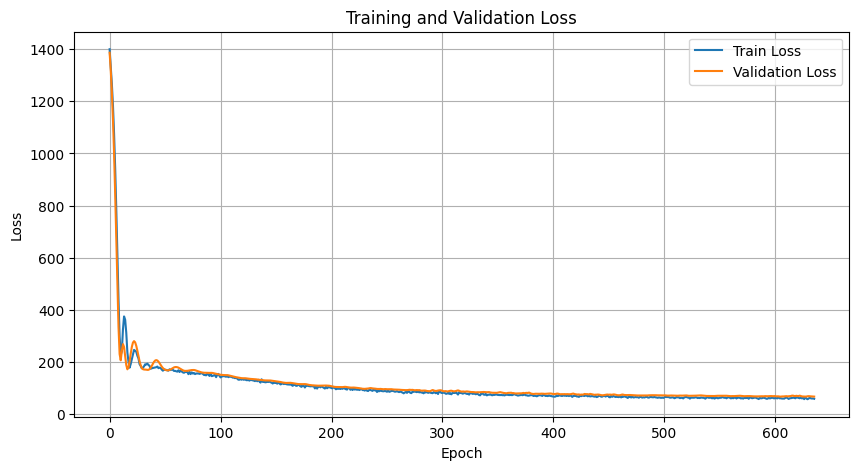

In [177]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [180]:
# Load best model for final evaluation
model.load_state_dict(torch.load('best_CR_gat.pt'))
test_loss = evaluate(data.test_mask)
print(f'Final Test Results - Loss: {test_loss:.4f}')

Final Test Results - Loss: 52.0316


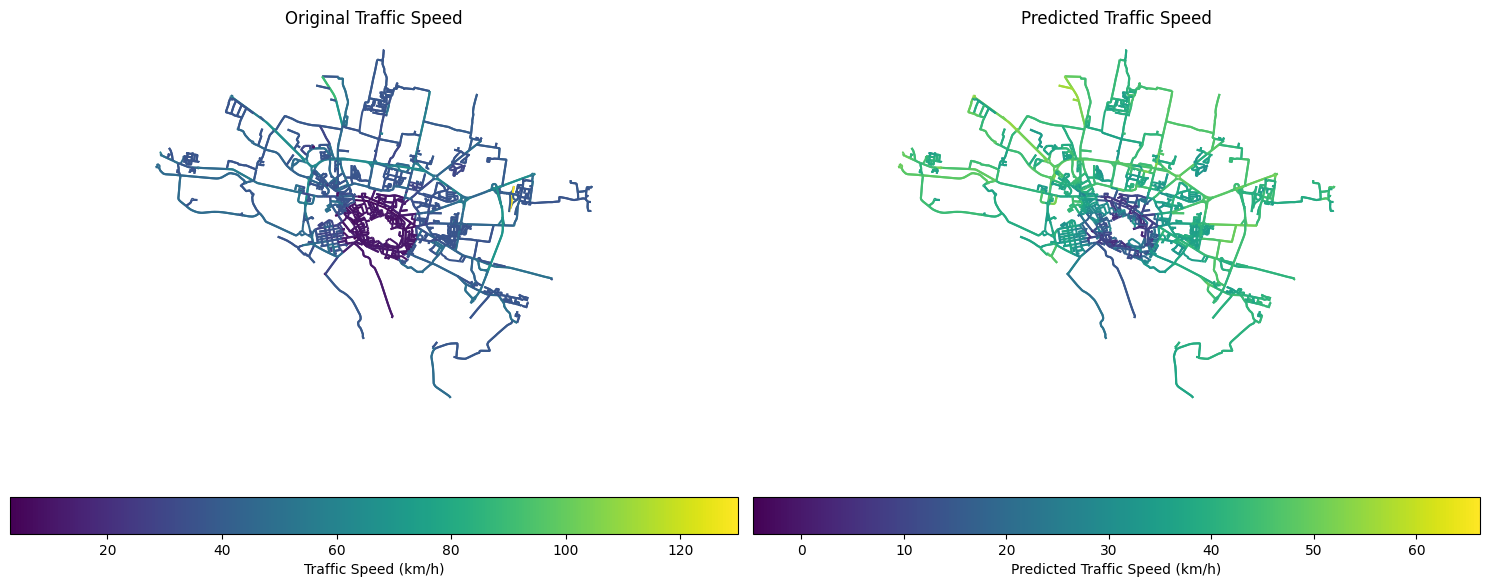

In [181]:
# Generate predictions for all nodes
model.eval()
with torch.no_grad():
    predictions = model(data).squeeze().cpu().numpy()
    
# Add predictions back to the geodataframe for visualization
edges_gnn['predictions'] = predictions

#Visualize the predictions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the original traffic speed
edges_gnn.plot(column='traffic_speed', ax=ax1, legend=True, cmap='viridis', legend_kwds={
    'label': "Traffic Speed (km/h)",
    'orientation': "horizontal"
})
ax1.set_title('Original Traffic Speed')
ax1.set_axis_off()

# Plot the predicted traffic speed
edges_gnn.plot(column='predictions', ax=ax2, legend=True, cmap='viridis', legend_kwds={
    'label': "Predicted Traffic Speed (km/h)",
    'orientation': "horizontal"
})
ax2.set_title('Predicted Traffic Speed')
ax2.set_axis_off()

plt.tight_layout()
plt.show()

Very nice, let's try to download another city and see how the predictions are

In [182]:
new_place_name = "Piacenza, Emilia-Romagna, Italy"
new_graph = ox.graph_from_place(new_place_name, network_type='drive', which_result= 2)
new_graph = ox.project_graph(new_graph)
new_gdf_nodes = ox.graph_to_gdfs(new_graph, edges=False)
new_gdf_edges = ox.graph_to_gdfs(new_graph, nodes=False, edges=True)


<Axes: >

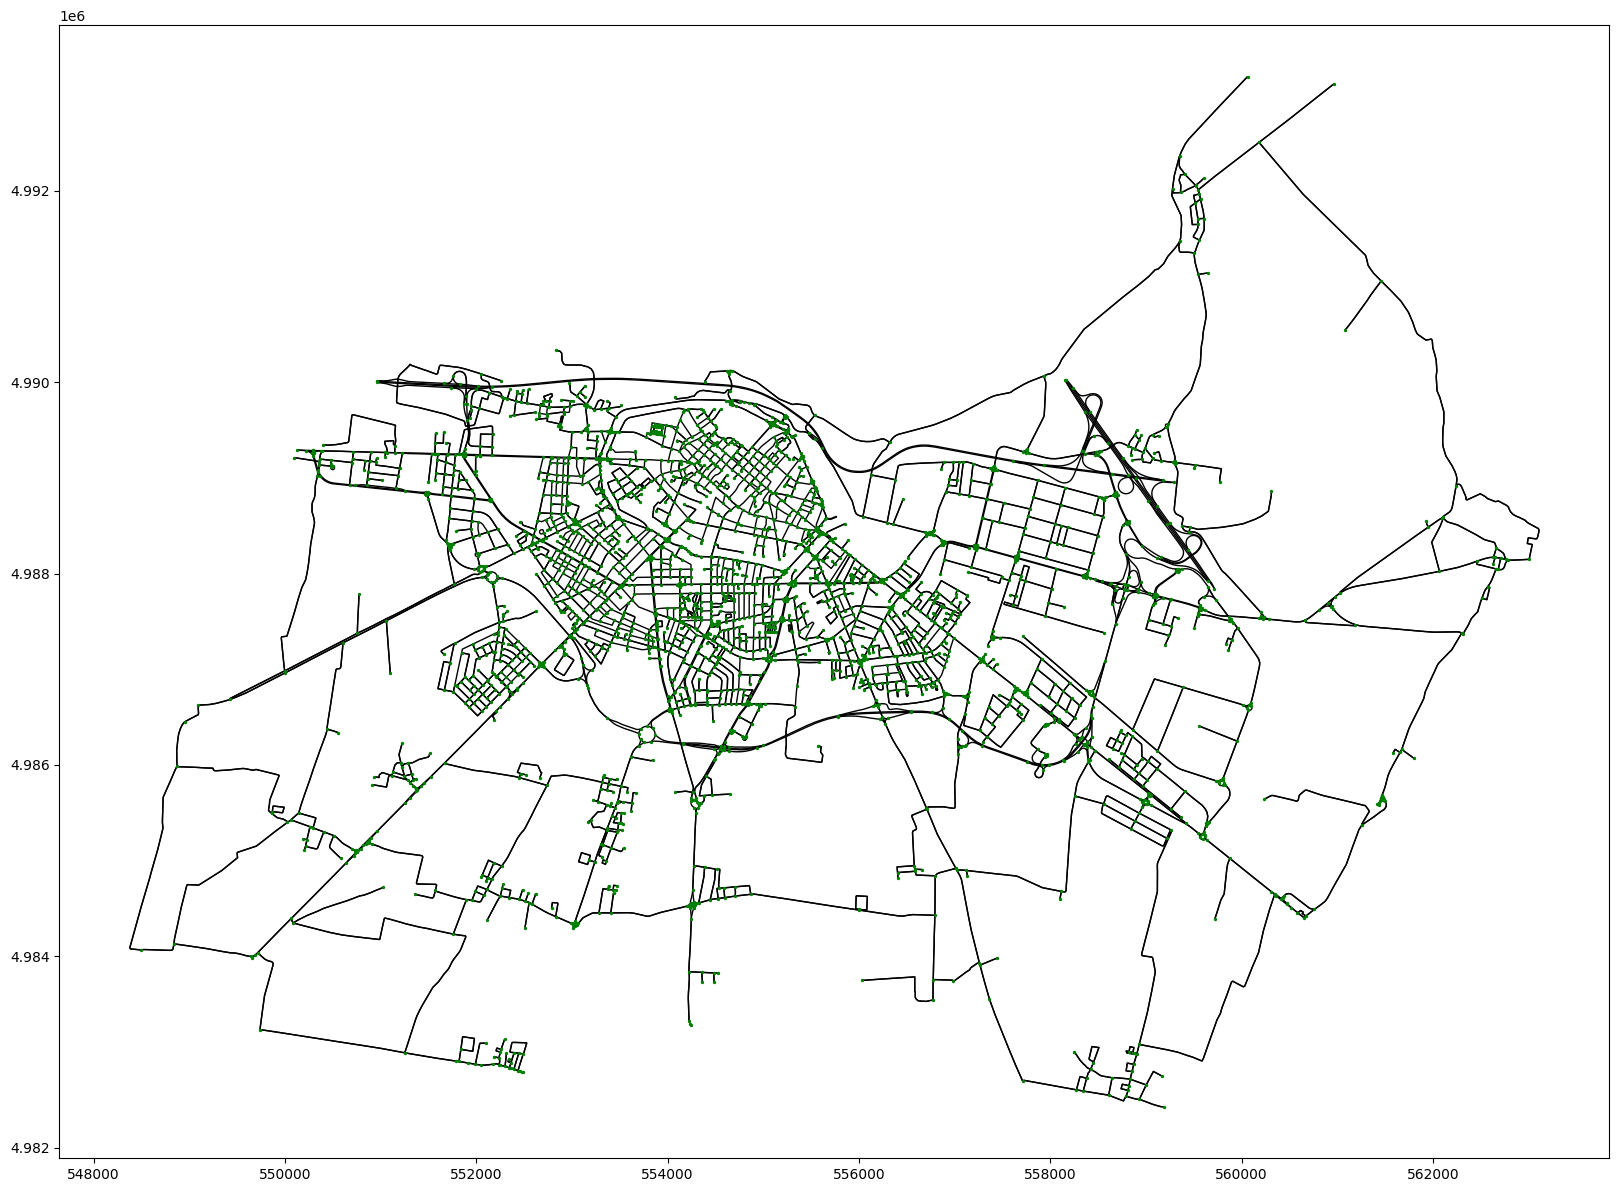

In [183]:
#plot
fig, ax = plt.subplots(figsize=(20,20))
new_gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
new_gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)


In [194]:
nodes_gnn.head()

y              x  street_count        bc highway  \
osmid                                                                    
249617125  5.000033e+06  578681.931488             3  0.034918     NaN   
302402633  4.999980e+06  578679.421611             3  0.034921     NaN   
249617128  4.999968e+06  578742.690104             3  0.036485     NaN   
302402587  4.999994e+06  578765.527141             3  0.038895     NaN   
302415503  4.999956e+06  578784.130629             3  0.045539     NaN   

          junction                        geometry  traffic_lights  
osmid                                                               
249617125      NaN  POINT (578681.931 5000032.907)           False  
302402633      NaN  POINT (578679.422 4999980.367)           False  
249617128      NaN   POINT (578742.69 4999967.629)           False  
302402587      NaN  POINT (578765.527 4999993.867)           False  
302415503      NaN  POINT (578784.131 4999955.721)           False

In [184]:
# Preprocess the new data
new_nodes_gnn = new_gdf_nodes.copy()
new_edges_gnn = new_gdf_edges.copy()

In [196]:
#compute betweenness centrality
new_bc = nx.betweenness_centrality(new_graph, weight='length')

#add it to the nodes
new_nodes_gnn['bc'] = new_bc.values()

In [202]:
# get traffic lights
new_traffic_lights = ox.features_from_place(new_place_name, tags={'highway':'traffic_signals'}, which_result=2)

new_traffic_lights = new_traffic_lights.to_crs(new_gdf_nodes.crs)

# find nearest node ALL IN ONCE
nearest_nodes = ox.distance.nearest_nodes(new_graph, new_traffic_lights.geometry.x, new_traffic_lights.geometry.y)
new_nodes_gnn['traffic_lights'] = new_nodes_gnn.index.isin(nearest_nodes)
new_nodes_gnn.head()

y              x  street_count            highway  \
osmid                                                                     
92972680   4.989948e+06  552165.187881             3                NaN   
298033861  4.989172e+06  557606.802876             3  motorway_junction   
92972786   4.987842e+06  559716.452461             3  motorway_junction   
92975190   4.988249e+06  559443.398421             3                NaN   
462186611  4.990028e+06  558166.848537             3                NaN   

          railway                        geometry        bc  traffic_lights  
osmid                                                                        
92972680      NaN  POINT (552165.188 4989947.849)  0.003208           False  
298033861     NaN  POINT (557606.803 4989172.463)  0.003207           False  
92972786      NaN  POINT (559716.452 4987842.127)  0.000000           False  
92975190      NaN  POINT (559443.398 4988249.205)  0.000308           False  
462186611     NaN  POINT (558166.849 4990027.869)  0.000000           False

<Axes: >

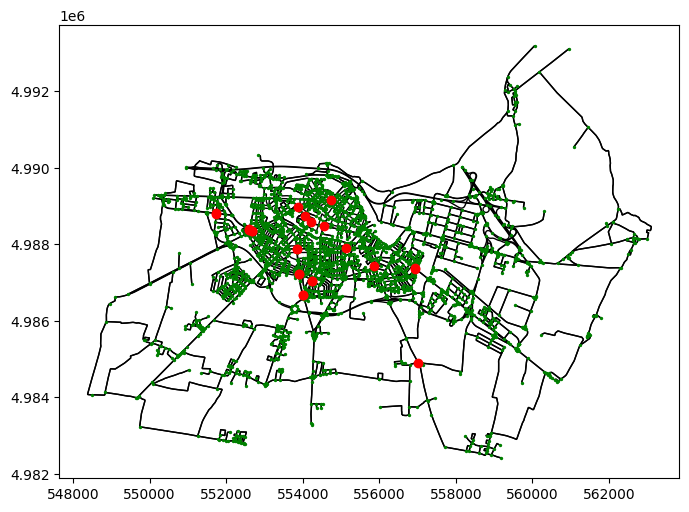

In [199]:
#plot
fig, ax = plt.subplots(figsize=(8,8))
new_gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
new_gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
new_traffic_lights.plot(ax=ax, color='red', zorder=3)

In [203]:

new_X = new_nodes_gnn.drop(columns= ['geometry', 'railway', 'highway'])
new_X = np.array(new_X.values)
scaler = StandardScaler()
new_X_scaled = scaler.fit_transform(new_X)
new_X_scaled

array([[ 1.53002134, -1.1789561 ,  0.170854  , -0.58064846, -0.08650797],
       [ 1.00758542,  1.0957817 ,  0.170854  , -0.5806734 , -0.08650797],
       [ 0.1112376 ,  1.97767056,  0.170854  , -0.71969608, -0.08650797],
       ...,
       [-0.22911044, -0.24330056,  0.170854  ,  1.46732202, -0.08650797],
       [ 0.94995522,  1.00623212,  0.170854  ,  0.11995486, -0.08650797],
       [ 1.18982278,  0.14519665, -2.4269308 , -0.71969608, -0.08650797]])

In [204]:
# Prepare edge index
new_node_to_id = {}
for i, node in enumerate(new_nodes_gnn.index):
    new_node_to_id[node] = i
new_start_node = [new_node_to_id[i[0]] for i in new_edges_gnn.index]
new_end_node = [new_node_to_id[i[1]] for i in new_edges_gnn.index]
new_start = torch.tensor(new_start_node, dtype=torch.long)
new_end = torch.tensor(new_end_node, dtype=torch.long)
new_edge_index = torch.stack([new_start, new_end], dim=0)

In [205]:
# Create dataset for node prediction
new_dataset = CremonaDataset(new_edge_index, new_X_scaled, Y)

Dataset created with 3231 nodes and 6930 edges


In [211]:
# Load best model for final evaluation
model.load_state_dict(torch.load('best_CR_gat.pt'))
model.eval()
with torch.no_grad():
    new_predictions = model(new_dataset[0]).squeeze().cpu().numpy()
# Add predictions back to the geodataframe for visualization
#normalize the predictions
scaler = MinMaxScaler()
new_predictions = scaler.fit_transform(new_predictions.reshape(-1, 1))
new_edges_gnn['predictions'] = new_predictions

Text(0.5, 1.0, 'Predicted Traffic Speed for Piacenza')

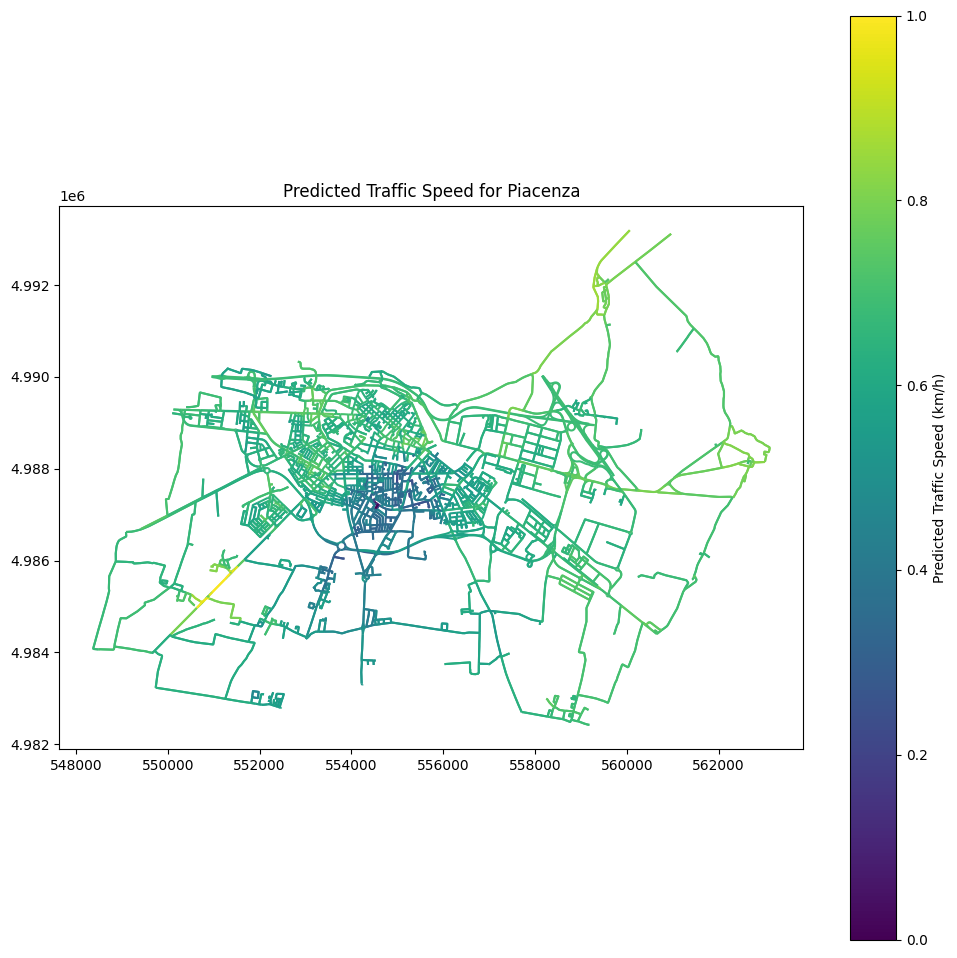

In [214]:
# Visualize the predictions

fig, ax = plt.subplots(figsize=(12, 12))
# Plot the predicted traffic speed
new_edges_gnn.plot(column='predictions', ax=ax, legend=True, cmap='viridis', legend_kwds={
    'label': "Predicted Traffic Speed (km/h)",
    'orientation': "vertical"
})
#new_traffic_lights.plot(ax=ax, color='red', zorder=3)
ax.set_title('Predicted Traffic Speed for Piacenza')
